## Final Project Submission

Please fill out:
* Student name:     Jennifer Lavoie
* Student pace:     self paced 
* Scheduled project review date/time: 
* Instructor name:  Jeff Herman 
* Blog post URL:


## Data Import Section

This section of code begins reading in of all provided csv files to explore the available data in order to determine what questions might be able to be answered using this data. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import json
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jenlavoie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## This section is for the import of the csv relating to IMDb data. 

In [2]:
imdb_df1 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

#dropping the birth year and death year columns as do not intend to use these in analysis
imdb_df1.drop(['birth_year', 'death_year'], axis=1, inplace=True)

imdb_df1.head()


,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


This csv contains "nconst" which appears to be an ID to reference the professionals associated with movie titles.  The titles are given also as an ID. 

In [3]:
print(len(imdb_df1)) #606648

606648


In [4]:
imdb_df2 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

# dropping these two columns which I do not intend to use in analysis for simplicity and readability 
imdb_df2.drop(['attributes', 'types'], axis=1, inplace=True)

imdb_df2.head()


,title_id,ordering,title,region,language,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,NaN,0.0


This csv links movie titles with their ID, indicates the region of release, language of the movie and whether or not the title is the original title.  It appears that the language column contains a lot of NaNs and might not be very useful in analysis. I won't be using this df any further for the analysis based on the questions I am asking.  

In [5]:
imdb_df3 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdb_df3.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This csv links the title of the movie to it's ID as well, giving it the name "tconst."  It also links it to a genre and gives information about the title the movie is known by v. original title. It also links the title to its release year and length of the movie. 

In [6]:
print(len(imdb_df3)) #146144

146144


In [7]:
imdb_df4 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdb_df4.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


This csv links the movie's ID, 'tconst' to the ID given in the first csv I imported from this set, identifying the writers and directors for the movie titles.  

In [8]:
print(len(imdb_df4)) #146144

146144


In [9]:
imdb_df5 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

# dropping the characters column as I will not be using this in my analysis.  It linked actors to their characters
# in a particular movie ID and is NaN for everyone else.  
imdb_df5.drop('characters', axis=1, inplace=True)

imdb_df5.head()


,tconst,ordering,nconst,category,job
0,tt0111414,1,nm0246005,actor,NaN
1,tt0111414,2,nm0398271,director,NaN
2,tt0111414,3,nm3739909,producer,producer
3,tt0323808,10,nm0059247,editor,NaN
4,tt0323808,1,nm3579312,actress,NaN


This csv links movie titles to various job titles, including actor, director, producer, etc.  It links again with "nconst." Names for "nconst" are linked in the first csv I read in on this project. Characters was also a column in this dataframe, but I dropped it for readability as I will not be using that column in this analysis.  

In [10]:
imdb_df6 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

imdb_df6.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This csv links the average rating of a movie and the number of votes it received by "tconst" movie ID.  

In [11]:
print(len(imdb_df6)) #73856

73856


## This section is the import of the csv for data from TheMovieDB.org

In [12]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# dropping the blank column inserted upon read-in of this csv
tmdb_df.drop('Unnamed: 0', axis=1, inplace=True)

# Converting vote_average to float
tmdb_df['vote_average'] = pd.to_numeric(tmdb_df['vote_average'],errors='coerce')

tmdb_df.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This csv gives information on a movie's ranking on this web site and the number of votes, as well as a popularity ranking. It also assigns an ID to the movie, and it provies genre_ids, but does not provide a way to decode to what genre those ids are linked.

In [13]:
print(len(tmdb_df)) #26517

26517


In [14]:
# Verifying no NaN values in the vote average column which will be used for analysis in this project
tmdb_df['vote_average'].isna().sum()

0

In [15]:
# Verifying no odd characters or strange data in this column
tmdb_df['vote_average'].unique()

array([ 7.7,  6.8,  7.9,  8.3,  6.1,  7.4,  7.2,  7.5,  6.6,  6. ,  6.7,
        4.5,  7.3,  8.1,  6.3,  4.6,  5.7,  5.9,  8.2,  6.2,  6.4,  7.6,
        6.5,  7.1,  5.6,  5.3,  7. ,  5.8,  4.9,  5.1,  5.5,  6.9,  5.4,
        7.8,  4.7,  4.1,  4.8,  3.2,  8. ,  3.7,  5.2,  2.7,  4.4,  5. ,
        2.9,  2. ,  4. ,  4.2,  3.9,  4.3,  3.5,  3.8,  3.6,  3.4,  3.3,
        3.1,  3. ,  2.5,  2.6, 10. ,  2.2,  1.7,  2.8,  2.3,  1.6,  1.8,
        2.4,  1.5,  8.6,  1.9,  9. ,  8.7,  0.5,  1. ,  8.4,  2.1,  8.8,
        1.3,  9.5,  8.5,  9.8,  0. ,  8.9,  9.3,  9.4,  9.2,  0.8,  1.2,
        1.4,  9.1,  9.7])

## This section is for the import of the csv relating to Box Office Mojo data

In [16]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# columns that need to be converted to numeric columns
cols = ['domestic_gross', 'foreign_gross']

# loop to convert columns to numeric, coerce will replace any non-numeric values in the columns to NaN
for col in cols:
    bom_df[col] = pd.to_numeric(bom_df[col], errors='coerce')

bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


This csv links a movie title to its domestic and foreign profit, as well as the year released. It provides an abbreviation for studio, but no key available to determine what they mean.  

In [17]:
print(len(bom_df)) # 3387

3387


In [18]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


out of 3387 entries, domestic_gross, the column I intend to use in analysis, is non-null for 3359 entries.  There are no null entries for title.  

In [19]:
# Look for any odd values in the columns of interest
for col in cols:
    print(col, '\n', bom_df[col].value_counts(), '\n\n')
    
# None found

domestic_gross 
 1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64 


foreign_gross 
 1200000.0      23
1100000.0      14
4200000.0      12
1900000.0      12
2500000.0      11
               ..
248100000.0     1
494100000.0     1
9500.0          1
92000000.0      1
128000.0        1
Name: foreign_gross, Length: 1199, dtype: int64 




## This section is for the import of data from 'tn'

In [20]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# list of columns that will be converted to numeric
cols = ['production_budget', 'domestic_gross']

# removal of $ and , so that columns can be converted to numeric
tn_df[cols] = tn_df[cols].replace({'\$':'', ',':''}, regex = True)

# conversion of the specified columns to numeric.  Coerce will remove any non-numeric values.
for col in cols:
    tn_df[col] = pd.to_numeric(tn_df[col], errors='coerce')

tn_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"


It is unclear which site this csv came from.  It links release date with movie title, production budget, and the domestic and worldwide gross of each movie. 

In [21]:
tn_df.drop(['id', 'worldwide_gross'], axis=1, inplace=True)

Dropping these columns for readability as they will not be used in the analysis.

In [22]:
print(len(tn_df)) # 5782


5782


In [23]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 180.8+ KB


There are no null entries for production budget, movie, or domestic gross, the columns of interest.

In [24]:
# Look for any odd values in the columns of interest
for col in cols:
    print(col, '\n', tn_df[col].value_counts(), '\n\n')

# There are a number of movies with 0 revenue domestic and some with 0 revenue worldwide.  

production_budget 
 20000000    231
10000000    212
30000000    177
15000000    173
25000000    171
           ... 
16400000      1
103000        1
6537890       1
780000        1
28500000      1
Name: production_budget, Length: 509, dtype: int64 


domestic_gross 
 0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64 




## This section is for the import of the Rotten Tomatoes data

In [25]:
rt_df1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

rt_df1.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This file provies information on movie titles, including an ID that is assigned to each movie, but no movie title. Will not be able to link this data to the files from the other sites.    

In [26]:
print(len(rt_df1)) # 1560

1560


In [27]:
# checking to see how many of the movies are missing box_office values.  
rt_df1['box_office'].isna().sum() #1220

1220

I can analyze ratings v. box office for only 340 movies for this dataset. There is no way to connect this data to other data sets as there is no ID in common and no movie titles listed for this data.  Would not be able to match any of this data to the data set that contains film budget.

In [28]:
rt_df2 = pd.read_csv('Data/rt.reviews.tsv', usecols = ['id','rating', 'fresh', 'critic', 
                   'top_critic', 'publisher', 'date'], sep='\t')

# grouping by ID to observe the ratings info for each movie.
rt_df2.groupby('id') 

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This data provides a link to the other Rotten Tomatoes data via movie ID.  I can link those movies to their Rotten Tomatoes rating using this data. Each movie ID has more than one row associated with a review from a different critic.  I did not import the text comment portion of the critic reviews as it created problems with the import and I had no need for that information in this particular analysis. 

In [29]:
# all of the ratings are out of 5.  Removing the "/5" portion of the rating to get average rating for each movie.
rt_df2['rating']= rt_df2['rating'].str.split("/", n = 1, expand = True) 

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Preparing the data to form a column with the mean of the ratings for each movie given that there are many movies that have NaN values for ratings by particular critics.  The mean rating will be more informative. The ratings are #/5 format, since the ratings are based on a 1-5 scale.  Splitting the data so that only the rating remains. 

In [30]:
# Removing NaN rows
rt_df2 = rt_df2[rt_df2['rating'].notna()]

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,2,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,2,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [31]:
#Noting that some of the ratings are letters rather than numbers, print a list of unique values found in the ratings

print(rt_df2['rating'].unique())

['3' 'C' '2' 'B-' 'B' '4' '6' '1' '8' '2.5' '2.0' '7' 'A-' '5' 'F' '3.5'
 'D+' '1.5' 'B+' '9' '7.5' '5.5' 'C-' 'C+' '0' '0.5' 'D' '3.1' '4.5' 'D-'
 'A+' 'A' '4.0' '9.5' '2.1' '6.5' '3.7' '8.4' '7.2' '2.2' '7.7' '5.0'
 '8.5' '3.0' '2.3' '8.6' '2.7' '4.2' '5.8' '7.1' 'N' 'R' '5.9' '2.4' '1.9'
 '4.9' '7.4' '8.8' '3.8' '6.8' '7.3' '7.0' '3.2' '6.3' '7.6' '8.1' '3.6'
 '1.8' '8.9' '8.2' '8.3' '2.6' '4.1' 'F+' '6.0' '1.0' '7.9' '8.7' '4.3'
 '9.6' '9.0' '1.7' '6.7' '8.0' '9.2' '5.2' '4.7' '6.2' '3.4' '9.7' '3.3'
 '4.8' '1.6' '1-5' '7.8' 'F-' '4.4' '6.9' 'T' '9.8' '3 1']


In [32]:
# Remove all of the values found in the ratings column that are not numbers. 
letters = ['C', 'B-', 'B', 'A-', 'F', 'D+', 'B+', 'C-', 'C+', 'D', 'D-', 'A', 'A+', 'N', 'R', 'F+',
          'F-', 'T']

rt_df2 = rt_df2[~rt_df2['rating'].isin(letters)]

rt_df2.head()

print(rt_df2['rating'].unique())

['3' '2' '4' '6' '1' '8' '2.5' '2.0' '7' '5' '3.5' '1.5' '9' '7.5' '5.5'
 '0' '0.5' '3.1' '4.5' '4.0' '9.5' '2.1' '6.5' '3.7' '8.4' '7.2' '2.2'
 '7.7' '5.0' '8.5' '3.0' '2.3' '8.6' '2.7' '4.2' '5.8' '7.1' '5.9' '2.4'
 '1.9' '4.9' '7.4' '8.8' '3.8' '6.8' '7.3' '7.0' '3.2' '6.3' '7.6' '8.1'
 '3.6' '1.8' '8.9' '8.2' '8.3' '2.6' '4.1' '6.0' '1.0' '7.9' '8.7' '4.3'
 '9.6' '9.0' '1.7' '6.7' '8.0' '9.2' '5.2' '4.7' '6.2' '3.4' '9.7' '3.3'
 '4.8' '1.6' '1-5' '7.8' '4.4' '6.9' '9.8' '3 1']


In [33]:
# Convert ratings to float from str.  
rt_df2['rating'] = pd.to_numeric(rt_df2['rating'],errors='coerce')

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
7,3,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
12,3,2.0,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
14,3,3.0,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,3.0,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"


In [34]:
print(len(rt_df2)) #34447

34447


In [35]:
# getting mean rating for each id
rt_df3 = rt_df2.groupby('id', as_index=False)['rating'].mean()

rt_df3 = rt_df3.rename(columns={'rating': 'mean_rating'})

rt_df3.head()

,id,mean_rating
0,3,3.303191
1,5,3.500000
2,6,2.987179
3,8,4.055556
4,10,2.722222


This dataframe I created gives only the ID of the movie and the mean rating of that movie. It can be combined later with rt_df1 to give a dataframe that contains all the movies in the rt data and their respective ratings.  

In [36]:
print(len(rt_df3)) #1077

1077


In [37]:
rt_combine = pd.merge(rt_df1, rt_df3, how = 'inner', left_on ='id', right_on ='id')

# Dropping some columns that won't pertain to this analysis for readability
rt_combine.drop(['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', 
                'runtime', 'studio'], axis=1, inplace=True)

rt_combine.head()

,id,genre,director,box_office,mean_rating
0,3,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",3.303191
1,5,Drama|Musical and Performing Arts,Allison Anders,NaN,3.500000
2,6,Drama|Mystery and Suspense,Barry Levinson,NaN,2.987179
3,8,Drama|Kids and Family,Jay Russell,NaN,4.055556
4,10,Comedy,Jake Kasdan,"41,032,915",2.722222


This dataframe combines the dataframe containing the mean_ratings with the dataframe containing the genre and movie ID and boxoffice information.  

In [38]:
print(len(rt_combine)) # 1077

1077


## With the data available, I will seek to answer the following 3 questions:

1.  Which movie genres have the highest viewer ratings and do ratings given to a movie by viewers have a relationship to the domestic gross income of a movie?   
2.  Which genres tend to cost more to make and which genres tend to have the highest domestic gross?   
3.  Does the size of the movie budget impact the domestic gross income of a movie?

## Functions and Global Plot Settings

In [39]:
def get_keys(path):
    
    """ 
    Function for getting the API key.
  
    This function will take in the path of the API key and open the file and load the JSON containing
    the API key for use in API call.  
  
    Parameters: 
    path (str): the path of the file that contains the API key.
    
  
    Returns: 
    JSON containing API key  
  
    """
    
    with open(path) as f:
        return json.load(f)

In [40]:
# code to access the hex codes for my seaborn color pallette
pal = sns.color_palette('BuGn_r')
pal.as_hex()

['#05712f', '#2c9553', '#51b689', '#84cfb9', '#bde6de', '#e2f4f7']

In [41]:
# setting my default seaborn pallette
sns.set_palette('BuGn_r')
sns.set_style('whitegrid')

In [42]:
def histogram_subplots(data1, data2, xlabel1, xlabel2, ylabel1, ylabel2, title1, title2, 
                             bins1 = 'auto', bins2 = 'auto'):
    
    """ 
    Function for generating 2 histogram subplots.
  
    This function will take in the arguments of data1, data2, xlabel1, xlabel2, ylabel1, ylabel2, title1, title2, 
                             bins1 = 'auto', bins2 = 'auto' in order to generate boxplots.  
  
    Parameters: 
    data1 (df): the name and column of the dataframe that contains the first histogram data; format: df['column'].
    data2 (df): the name and column of the dataframe that contains the second histogram data; format: df['column'].
    xlabel1 (str):  the label to be given to the x-axis of the first subplot
    xlabel2 (str):  the label to be given to the x-axis of the second subplot
    ylabel1 (str):  the label to be given to the y-axis of the first subplot
    ylabel2 (str):  the label to be given to the y-axis of the second subplot
    title1 (str):   the title to be given to the first subplot
    title2 (str):   the title to be given to the second subplot
    bins1 (int):    the number of bins the first histogram will place the data in.  Defaults to 'auto' 
                    integer argument can be added to customize
    bins2 (int):    the number of bins the first histogram will place the data in.  Defaults to 'auto' 
                    int argument can be added to customize
  
    Returns: 
    A subplot containing two formatted histograms showing the distribution of data in the desired columns side by side.  
  
    """
    
    new_figure = plt.figure(figsize=(20,10))

    ax = new_figure.add_subplot(1, 2, 1)
    ax2 = new_figure.add_subplot(1, 2, 2)

    ax.hist(data1, color='#bde6de', bins= bins1)
    ax.set_title(title1)
    ax.set_xlabel(xlabel1)
    ax.set_ylabel(ylabel1)
    ax.xaxis.get_offset_text().set_visible(False)
    ax.yaxis.get_offset_text().set_visible(False)
    
    ax.axvline(data1.mean(), color='#2c9553');

    ax2.hist(data2, color='#bde6de', bins= bins2)
    ax2.set_title(title2)
    ax2.set_xlabel(xlabel2)
    ax2.set_ylabel(ylabel2)
    ax2.xaxis.get_offset_text().set_visible(False)
    ax2.yaxis.get_offset_text().set_visible(False)
    ax2.axvline(data2.mean(), color='#2c9553');
    
    

    plt.show()

In [43]:
def box_subplts(data, y1, y2, ylabel1, ylabel2, title1, title2):
    
    """ 
    Function for generating 2 boxplot subplots.
  
    This function will take in the arguments of data, y1, y2, ylabel1, ylabel2, title1, and title 2 in order to 
    generate boxplots.  
  
    Parameters: 
    data (df): the name of the dataframe that contains the data
    y1 (str):  the name of the column that contains the data for the first subplot
    y2 (str):  the name of the column that contains the data for the second subplot
    ylabel1 (str):  the label to be given to the y-axis of the first subplot
    ylabel2 (str):  the label to be given to the y-axis of the second subplot
    title1 (str):  the title to be given to the first subplot
    title2 (str):  the title to be given to the second subplot
  
    Returns: 
    A subplot containing two formatted boxplots showing the distribution of data in the desired columns side by side.  
  
    """
    
    f, ax = plt.subplots(1, 2, figsize=(20,10))

    sns.boxplot(y = y1, data = data,  color='#bde6de', 
            ax=ax[0]).set_title(title1)
    ax[0].set(ylabel = ylabel1)
    ax[0].xaxis.get_offset_text().set_visible(False)
    ax[0].yaxis.get_offset_text().set_visible(False)

    sns.boxplot(y = y2, data = data,  color='#bde6de', 
            ax=ax[1]).set_title(title2)
    ax[1].set(ylabel = ylabel2)
    ax[1].xaxis.get_offset_text().set_visible(False)
    ax[1].yaxis.get_offset_text().set_visible(False)
    
   
    
    plt.show()
    

In [44]:
def seaborn_scatter(x, y, data, title, ylabel, xlabel):
    
    """ 
    Function for generating a seaborn scatterplot.
  
    This function will take in the arguments of x, y, data, title, ylabel, xlabel in order to 
    generate a seaborn lmplot.  
  
    Parameters: 
    x (str):       the name of the column containing the independent variable
    y (str):       the name of the column containing the dependent variable 
    data (df):     the name of the dataframe that contains the data
    title (str):   the title to be given to the plot
    ylabel (str):  the label to be given to the y-axis of the plot
    xlabel (str):  the label to be given to the x-axis of the plot
    
  
    Returns: 
    A simple, formatted, linear regression plot for the desired data.
  
    """
    plt.figure(figsize=(10,10))
    
    ax = sns.scatterplot(x= x, y= y, color='#bde6de', data= data)
    sns.set_context('talk')
    
    

    plt.title(title, pad=40)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    
    plt.show()
    
    #scatter_kws={'color':'#bde6de', 's':10},  
     #       line_kws={'color':'#51b689'}, height=8.00, aspect=10.00/8.00, fit_reg=True

In [45]:
def seaborn_bplot(x, y, data, title, xlabel, ylabel):
    
    """ 
    Function for generating a formatted seaborn boxplot.
  
    This function will take in the arguments of x, y, data, title, ylabel, xlabel in order to 
    generate a seaborn boxplot.  
  
    Parameters: 
    x (str):       the name of the column containing the independent variable or dependent 
                    variable for a horizontal plot
    y (str):       the name of the column containing the dependent variable or independent 
                    variable for a horizontal plot
    data (df):     the name of the dataframe that contains the data
    title (str):   the title to be given to the plot
    ylabel (str):  the label to be given to the y-axis of the plot
    xlabel (str):  the label to be given to the x-axis of the plot
    
  
    Returns: 
    A simple, formatted, boxplot for the desired data.
  
    """

    plt.figure(figsize=(20,10))

    boxplot= sns.boxplot(x= x, y = y, data = data, color='#bde6de').set_title(title)
    boxplot.axes.set_xlabel(xlabel)
    boxplot.axes.set_ylabel(ylabel)

    
plt.show()

In [46]:
def genre_barplots(x, y, data, title, xlabel, ylabel, order=None):
    
    """ 
    Function for generating a formatted seaborn barplot.
  
    This function will take in the arguments of x, y, data, title, ylabel, xlabel, group by genre,  
    sort by mean rating, then generate formatted seaborn boxplot for this data.   
  
    Parameters: 
    x (str):             the name of the column containing the independent variable or dependent 
                         variable for a horizontal plot.  
    y (str):             the name of the column containing the dependent variable or independent 
                         variable for a horizontal plot. 
    data (df):           the name of the dataframe that contains the data.
    title (str):         the title to be given to the plot.
    ylabel (str):        the label to be given to the y-axis of the plot.
    xlabel (str):        the label to be given to the x-axis of the plot.
    order (df[column]):  this allows you to generate the bars in a sorted order of your choice.  The default
                         is None.  
    
  
    Returns: 
    A simple, formatted, barplot for the desired data.  
  
    """

    plt.figure(figsize=(20,10))


    sns.barplot(x= x, y= y, data=data, order=order, ci = None, color='#bde6de') 
    sns.set_context('talk')

    #plt.xticks(rotation=45) 
    plt.title(title)
    plt.ylabel(ylabel, labelpad=20)
    plt.xlabel(xlabel, labelpad=20)


    plt.show()

## Code and Visualizations pertinent to answering Question 1 

Which movie genres have the highest viewer ratings and do ratings given to a movie by viewers have a relationship to the domestic gross income of a movie?   

## Question 1 - Rotten Tomatoes Data 

In [47]:
# first make copy of the original dataframe
rt_genres = rt_combine.copy() 

# split the genre string at the | that separates them
rt_genres['genre'] = rt_genres['genre'].str.split("|")

# expands the rows such that each row contains one genre
rt_genres = rt_genres.explode('genre')

rt_genres.head()

,id,genre,director,box_office,mean_rating
0,3,Drama,David Cronenberg,"600,000",3.303191
0,3,Science Fiction and Fantasy,David Cronenberg,"600,000",3.303191
1,5,Drama,Allison Anders,NaN,3.500000
1,5,Musical and Performing Arts,Allison Anders,NaN,3.500000
2,6,Drama,Barry Levinson,NaN,2.987179


This dataframe splits out the genre information for each movie into separate rows since each movie had more than one genre listed.  This dataframe can be used to compare Rotten Tomatoes box office to ratings and genre to ratings.  

In [48]:
rt_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 1076
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2502 non-null   int64  
 1   genre        2500 non-null   object 
 2   director     2228 non-null   object 
 3   box_office   637 non-null    object 
 4   mean_rating  2502 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 117.3+ KB


The box office, mean_ratings, and genre columns are the columns of interest.  Both the genre and mean_rating columns contain some null values.

In [49]:
# convert box_office column to str
rt_genres['box_office'] = rt_genres['box_office'].astype(str)

In [50]:
# remove the comma between the numbers in the box_office column
rt_genres['box_office'] = rt_genres['box_office'].replace({',':''}, regex = True)

# convert the box_office column to numeric.
rt_genres['box_office'] = pd.to_numeric(rt_genres['box_office'], errors='coerce')

In [51]:
rt_genres.describe()

,id,box_office,mean_rating
count,2502.000000,6.370000e+02,2502.000000
mean,1005.471623,3.979680e+07,3.107432
std,580.047850,5.517270e+07,0.851513
min,3.000000,3.630000e+02,0.800000
25%,502.250000,2.839256e+06,2.500000
50%,1008.500000,1.630233e+07,3.076505
75%,1499.000000,5.310000e+07,3.714286
max,2000.000000,3.680000e+08,9.000000


In [52]:
rt_genres['genre'].unique()

array(['Drama', 'Science Fiction and Fantasy',
       'Musical and Performing Arts', 'Mystery and Suspense',
       'Kids and Family', 'Comedy', 'Action and Adventure', nan,
       'Documentary', 'Special Interest', 'Classics',
       'Art House and International', 'Romance', 'Horror',
       'Sports and Fitness', 'Animation', 'Western',
       'Faith and Spirituality', 'Television', 'Cult Movies',
       'Anime and Manga', 'Gay and Lesbian'], dtype=object)

Verifying no odd values in the genre column. None found. 

In [53]:
rt_genres_sorted = rt_genres.sort_values("genre", inplace=False)

rt_genres_sorted.head()

,id,genre,director,box_office,mean_rating
575,1081,Action and Adventure,NaN,600000.0,2.734043
931,1740,Action and Adventure,John Gray,NaN,1.500000
430,816,Action and Adventure,Anthony Bell|Ben Gluck|Benjamin Gluck,25077977.0,2.406250
701,1314,Action and Adventure,Stephen Shin,NaN,3.500000
932,1741,Action and Adventure,Jim Goddard,NaN,1.142857


Creating a database sorted by genre for plotting.  

In [54]:
# grouping by genre and sorting by the mean_ratings for each genre 
result = rt_genres_sorted.groupby(['genre'])['mean_rating'].aggregate(np.mean).reset_index().sort_values(['mean_rating'], 
                                                                                                  ascending=False)

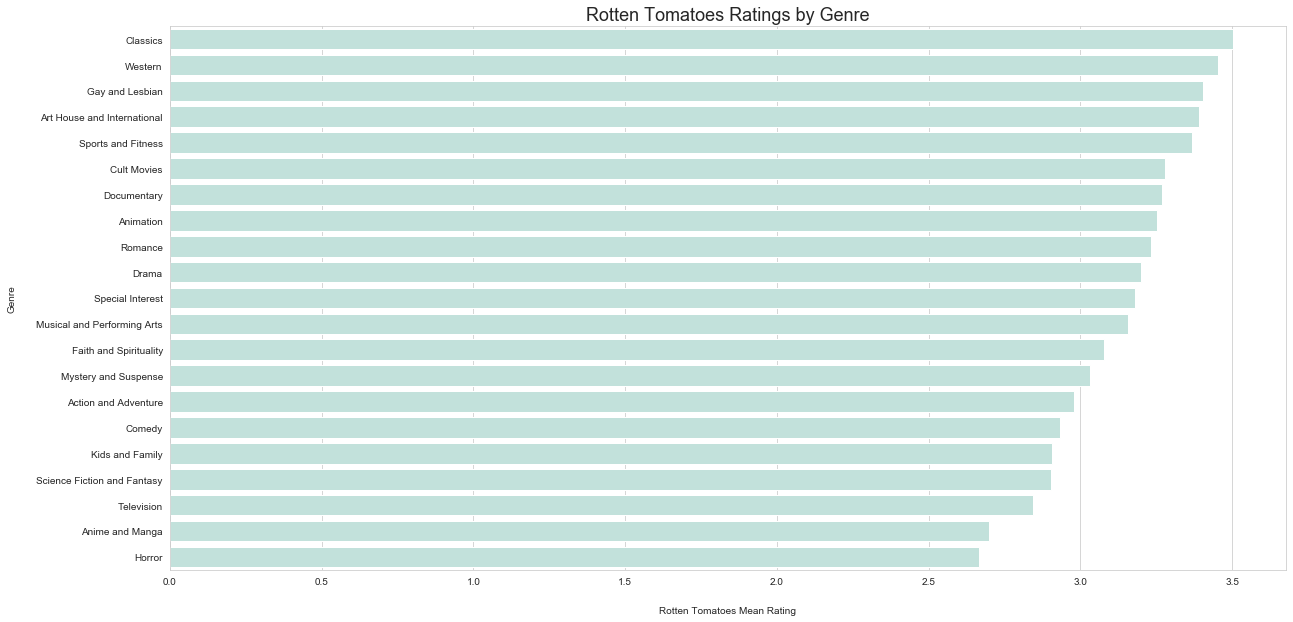

In [55]:
genre_barplots('mean_rating', 'genre', rt_genres_sorted, 'Rotten Tomatoes Ratings by Genre', 
               'Rotten Tomatoes Mean Rating', 'Genre', result['genre'])

This bar plot shows the genres sorted by mean rating in descending order.  

In [56]:
# making copy of the original dataframe
rt_boxoffice = rt_combine.copy()

# dropping NaNs in the boxoffice column
rt_boxoffice.dropna(subset = ['box_office'], axis = 0, inplace=True)

rt_boxoffice.head()

,id,genre,director,box_office,mean_rating
0,3,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",3.303191
4,10,Comedy,Jake Kasdan,"41,032,915",2.722222
5,13,Drama,Ray Lawrence,"224,114",3.387879
6,14,Drama,Taylor Hackford,"134,904",2.055556
12,23,Drama,NaN,"99,165,609",4.176974


This dataframe contains only the movies in the Rotten Tomatoes data that contains information on how much the movie made at the box office.  

In [57]:
print(len(rt_boxoffice)) # 299

299


In [58]:
rt_boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 1072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           299 non-null    int64  
 1   genre        299 non-null    object 
 2   director     262 non-null    object 
 3   box_office   299 non-null    object 
 4   mean_rating  299 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.0+ KB


The only column containing null values is the director column, which is not being used for this analysis.

In [59]:
# convert box_office to string
rt_boxoffice['box_office'] = rt_boxoffice['box_office'].astype(str)

In [60]:
# remove the commas between the numbers in the box_office column
rt_boxoffice['box_office'] = rt_boxoffice['box_office'].replace({',':''}, regex = True)

# convert the box_office column to numeric 
rt_boxoffice['box_office'] = pd.to_numeric(rt_boxoffice['box_office'], errors='coerce')

In [61]:
rt_boxoffice.head()

,id,genre,director,box_office,mean_rating
0,3,Drama|Science Fiction and Fantasy,David Cronenberg,600000,3.303191
4,10,Comedy,Jake Kasdan,41032915,2.722222
5,13,Drama,Ray Lawrence,224114,3.387879
6,14,Drama,Taylor Hackford,134904,2.055556
12,23,Drama,NaN,99165609,4.176974


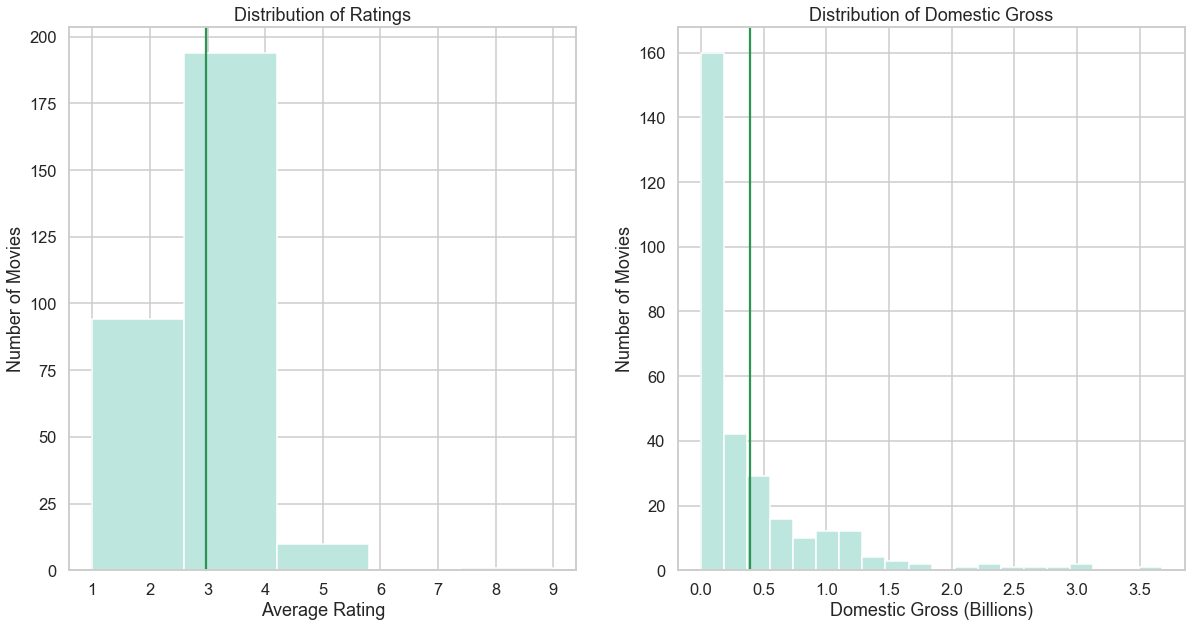

In [62]:
histogram_subplots(rt_boxoffice['mean_rating'], rt_boxoffice['box_office'], 'Average Rating', 
                         'Domestic Gross (Billions)', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Domestic Gross', 5, 20)

Histograms showing the distribution of the data for the average ratings and the box office income for the Rotten Tomatoes data.  The box office data is fairly right skewed.  

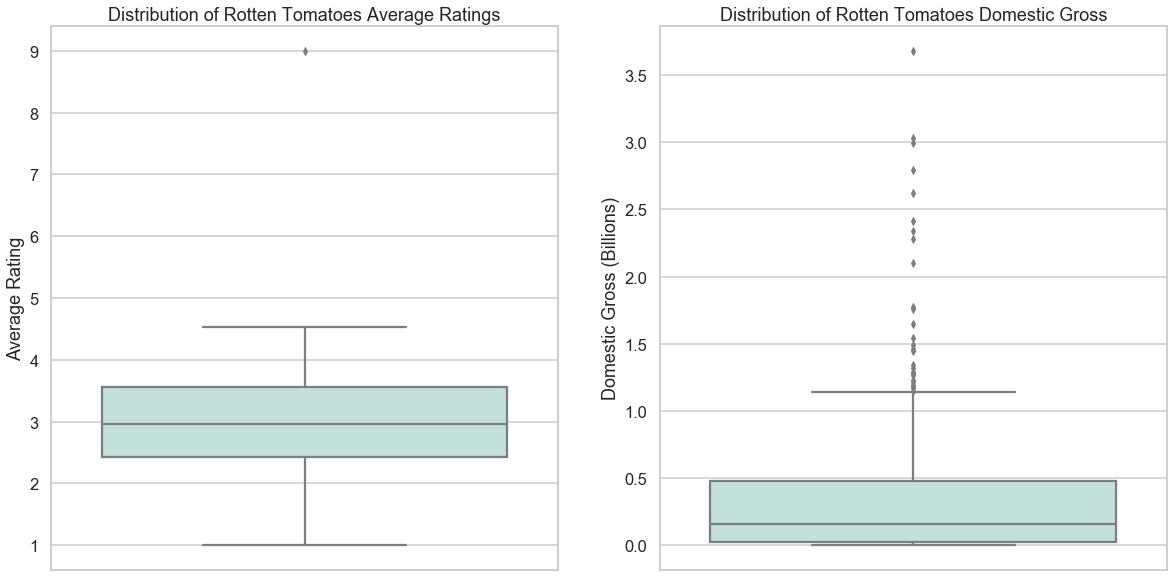

In [63]:
box_subplts(rt_boxoffice, 'mean_rating', 'box_office', 'Average Rating', 'Domestic Gross (Billions)', 
                           'Distribution of Rotten Tomatoes Average Ratings', 
            'Distribution of Rotten Tomatoes Domestic Gross')

Box plots for the average ratings and the box office earnings for the Rotten Tomatoes data.  These give a better visualization of how that data is distributed.  The ratings are fairly normally distributed, but the box office earnings have a large spread.  

In [64]:
rt_boxoffice.corr()['mean_rating'].sort_values()

box_office     0.077670
id             0.135164
mean_rating    1.000000
Name: mean_rating, dtype: float64

The correlation between box office earnings and ratings for the Rotten Tomatoes data is not strong at 0.0077670

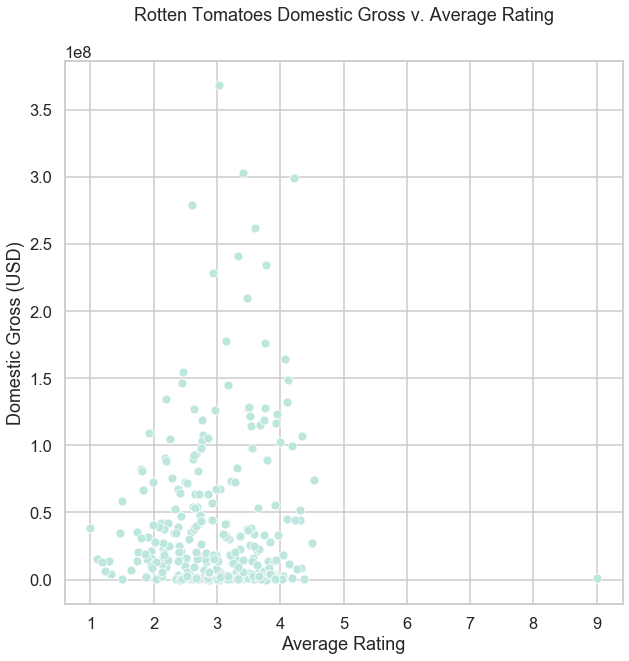

In [65]:
seaborn_scatter('mean_rating', 'box_office', rt_boxoffice, 'Rotten Tomatoes Domestic Gross v. Average Rating', 
                          'Domestic Gross (USD)', 'Average Rating')

A scatter plot of the Box Office earnings v. the Average Ratings for the Rotten Tomatoes data does not show any relationship between the earings and the ratings.  

In [66]:
# Bins the budgets into 10 bins and creates a new column in the dataframe with the bin each observation falls in.
rt_boxoffice['box_office_bins'] = pd.qcut(rt_boxoffice['box_office'], q=10, precision=0)

rt_boxoffice.head()

,id,genre,director,box_office,mean_rating,box_office_bins
0,3,Drama|Science Fiction and Fantasy,David Cronenberg,600000,3.303191,"(446335.0, 1597781.0]"
4,10,Comedy,Jake Kasdan,41032915,2.722222,"(39486966.0, 66815934.0]"
5,13,Drama,Ray Lawrence,224114,3.387879,"(362.0, 446335.0]"
6,14,Drama,Taylor Hackford,134904,2.055556,"(362.0, 446335.0]"
12,23,Drama,NaN,99165609,4.176974,"(66815934.0, 110151688.0]"


Created a dataframe with the box office earnings data binned into 10 bins containingly fairly equal observations.  With earnings having a large spread, breaking it into ranges may provide better visualization of how ratings are distributed across earnings ranges.  

In [67]:
rt_boxoffice['box_office_bins'].value_counts()

(110151688.0, 368000000.0]    30
(66815934.0, 110151688.0]     30
(39486966.0, 66815934.0]      30
(25284343.0, 39486966.0]      30
(10157720.0, 15536310.0]      30
(4141185.0, 10157720.0]       30
(1597781.0, 4141185.0]        30
(446335.0, 1597781.0]         30
(362.0, 446335.0]             30
(15536310.0, 25284343.0]      29
Name: box_office_bins, dtype: int64

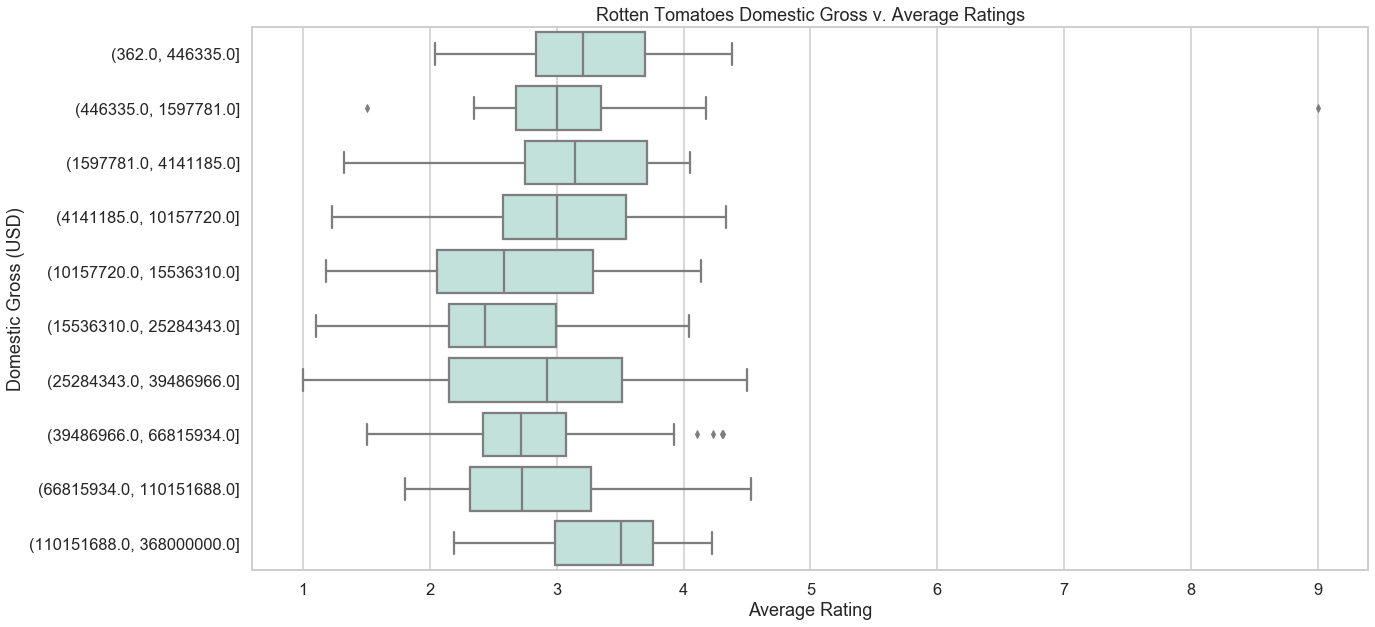

In [68]:
seaborn_bplot('mean_rating', 'box_office_bins', rt_boxoffice, 'Rotten Tomatoes Domestic Gross v. Average Ratings',
              'Average Rating', 'Domestic Gross (USD)')

In this boxplot visualization, it can be seen that the means of the average ratings are mostly within the same range in all the box office earnings ranges.  Ratings do not appear to have any impact on how much a movie earns.  

## Question 1 - IMDB Data 

In [69]:
imdb_data = pd.merge(imdb_df3, imdb_df6, how = 'inner', left_on ='tconst', right_on ='tconst')

imdb_data['averagerating'] = pd.to_numeric(imdb_data['averagerating'],errors='coerce')

imdb_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


This dataframe that combines the movie titles with their ratings for IMDb data.  Inner join provides for only those movies that appear in both tables as I want a dataframe of only movies that have ratings associated with them.  

In [70]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


The only column with null values is runtime_minutes which I do not plan to use in this analysis.  

In [71]:
imdb_data.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [72]:
print(len(imdb_data)) # 73856

73856


The length of this dataframe is less than df3 and the same as df6 since this will only include movies that have a rating score on IMDb.  

In [73]:
# Verifying no odd characters or data is in the average rating column 
print(imdb_data['averagerating'].unique())

# None found.

[ 7.   7.2  6.9  6.1  6.5  4.1  8.1  6.8  4.6  7.6  7.5  7.8  4.   8.8
  1.9  6.7  6.6  5.9  7.1  7.4  3.9  5.5  5.1  7.9  6.2  6.3  5.   6.
  5.6  7.3  4.9  6.4  3.3  5.7  8.6  4.8  4.5  4.2  8.7  4.7  5.2  8.3
  9.1  3.4  5.8  5.4  8.5  3.2  3.6  8.   3.8  7.7  4.3  3.   5.3  3.7
  3.5  9.3  8.9  9.   2.3  8.2  2.7  2.8  1.7  4.4  2.2  9.4  8.4  9.2
  9.7  3.1 10.   9.8  2.6  2.5  1.4  2.1  2.4  2.9  1.8  1.6  2.   1.
  1.2  1.5  1.3  1.1  9.5  9.6  9.9]


In [74]:
imdb_tn_merge = pd.merge(imdb_data, tn_df, how = 'inner', left_on ='primary_title', right_on ='movie')

# Dropping some columns that won't pertain to this analysis for readability
imdb_tn_merge.drop(['runtime_minutes', 'release_date', 'movie'], axis=1, inplace=True)

imdb_tn_merge.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,45000000,0
1,tt0326592,The Overnight,The Overnight,2010,NaN,7.5,24,200000,1109808
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,200000,1109808
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,25000000,720828
4,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,25000000,720828


This dataframe links imdb movie data to data found in the tn_df data, the only dataset that contains movie budget information and also contains domestic gross information. Some movie titles are listed in duplicate, but appears have different release years. 

In [75]:
imdb_tn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   genres             2867 non-null   object 
 5   averagerating      2875 non-null   float64
 6   numvotes           2875 non-null   int64  
 7   production_budget  2875 non-null   int64  
 8   domestic_gross     2875 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 224.6+ KB


The dataframe does not contain any NaN values.

In [76]:
imdb_tn_merge.describe()

,start_year,averagerating,numvotes,production_budget,domestic_gross
count,2875.000000,2875.000000,2.875000e+03,2.875000e+03,2.875000e+03
mean,2013.916522,6.249217,6.628038e+04,3.436427e+07,4.302909e+07
std,2.550258,1.185992,1.343077e+05,4.774360e+07,7.452513e+07
min,2010.000000,1.600000,5.000000e+00,1.400000e+03,0.000000e+00
25%,2012.000000,5.600000,1.410000e+02,5.000000e+06,5.017520e+05
50%,2014.000000,6.400000,7.951000e+03,1.700000e+07,1.652141e+07
75%,2016.000000,7.100000,7.508100e+04,4.000000e+07,5.186291e+07
max,2019.000000,9.300000,1.841066e+06,4.250000e+08,7.605076e+08


The mean average rating is around 6.2 while the mean production budget is around 30 million dollars. 

In [77]:
print(len(imdb_tn_merge)) # 2875

2875


In [78]:
imdb_bom_merge = pd.merge(imdb_data, bom_df, how = 'inner', left_on ='primary_title', right_on ='title')

# Dropping some columns that won't pertain to this analysis for readability
imdb_bom_merge.drop(['runtime_minutes', 'year', 'title', 'studio', 'foreign_gross'], axis=1, inplace=True)

imdb_bom_merge.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,domestic_gross
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",7.1,15378,1100000.0
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,744000.0
2,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,744000.0
3,tt5647250,On the Road,On the Road,2016,Drama,5.7,127,744000.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,58200000.0


Dataframe created that combines imdb data with bom data for additional information on domestic gross revenue for movie titles. Some movie titles are listed in duplicate, but appears have different release years.

In [79]:
print(len(imdb_bom_merge)) #3027

3027


In [80]:
imdb_revenue_merge = pd.merge(imdb_tn_merge, imdb_bom_merge, how = 'outer', 
                              left_on = ['tconst', 'primary_title', 'domestic_gross', 'averagerating', 
                                         'original_title', 'numvotes', 'start_year', 'genres'], 
                              right_on =['tconst', 'primary_title', 'domestic_gross', 'averagerating', 
                                         'original_title', 'numvotes', 'start_year', 'genres'])

imdb_revenue_merge.drop_duplicates(subset=None, keep='first', inplace=True)

imdb_revenue_merge.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,45000000.0,0.0
1,tt0326592,The Overnight,The Overnight,2010,NaN,7.5,24,200000.0,1109808.0
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,200000.0,1109808.0
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,25000000.0,720828.0
4,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,25000000.0,720828.0


This dataframe merges both dataframes that contain revenue info for movies that are also listed on imdb.  Outer join used so that this will include all the movies for which revenue info is available whether that movie is listed in tn, bom, or in both.  

In [81]:
print(len(imdb_revenue_merge)) # 5902

5902


In [82]:
# Look for NaN values in the columns of interest

cols = ['domestic_gross', 'averagerating']

for col in cols:
    print(col, '\n', imdb_revenue_merge[col].isna().sum())


domestic_gross 
 22
averagerating 
 0


In [83]:
imdb_revenue_merge.dropna(subset = ['domestic_gross'], axis = 0, inplace=True)

imdb_revenue_merge['domestic_gross'].isna().sum()

0

Dropping NaN values in the domestic_gross column.  It only affects 22 of the data points out of 5902.  

In [84]:
imdb_revenue_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5901
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             5880 non-null   object 
 1   primary_title      5880 non-null   object 
 2   original_title     5880 non-null   object 
 3   start_year         5880 non-null   int64  
 4   genres             5865 non-null   object 
 5   averagerating      5880 non-null   float64
 6   numvotes           5880 non-null   int64  
 7   production_budget  2875 non-null   float64
 8   domestic_gross     5880 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 459.4+ KB


In [85]:
imdb_revenue_merge.describe()

,start_year,averagerating,numvotes,production_budget,domestic_gross
count,5880.000000,5880.000000,5.880000e+03,2.875000e+03,5.880000e+03
mean,2013.853741,6.356973,6.413217e+04,3.436427e+07,3.669776e+07
std,2.507353,1.104473,1.300792e+05,4.774360e+07,7.090728e+07
min,2010.000000,1.600000,5.000000e+00,1.400000e+03,0.000000e+00
25%,2012.000000,5.800000,6.517500e+02,5.000000e+06,1.817500e+05
50%,2014.000000,6.500000,1.108900e+04,1.700000e+07,6.798848e+06
75%,2016.000000,7.100000,6.998600e+04,4.000000e+07,4.278445e+07
max,2019.000000,9.300000,1.841066e+06,4.250000e+08,7.605076e+08


The mean average rating for this combination data is around 6.4.  The mean domestic gross figure for this data is 37 million dollars.

In [86]:
# create copy of revenue df to create a genres dataframe without altering original
imdb_genres = imdb_revenue_merge.copy()

# split the multiple genres based on the comma that separates them 
imdb_genres['genres'] = imdb_genres['genres'].str.split(",")

# expand the rows such that a row is created for each genre for each movie
imdb_genres = imdb_genres.explode('genres')

imdb_genres.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,Action,1.9,8248,45000000.0,0.0
0,tt0249516,Foodfight!,Foodfight!,2012,Animation,1.9,8248,45000000.0,0.0
0,tt0249516,Foodfight!,Foodfight!,2012,Comedy,1.9,8248,45000000.0,0.0
1,tt0326592,The Overnight,The Overnight,2010,NaN,7.5,24,200000.0,1109808.0
2,tt3844362,The Overnight,The Overnight,2015,Comedy,6.1,14828,200000.0,1109808.0


Because multiple genres were listed for each movie, this dataframe splits those genres into a row for each genre for each movie.  This can be used to measure which genres in the IMDB data set have the highest ratings.

In [87]:
imdb_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13387 entries, 0 to 5901
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             13387 non-null  object 
 1   primary_title      13387 non-null  object 
 2   original_title     13387 non-null  object 
 3   start_year         13387 non-null  int64  
 4   genres             13372 non-null  object 
 5   averagerating      13387 non-null  float64
 6   numvotes           13387 non-null  int64  
 7   production_budget  6452 non-null   float64
 8   domestic_gross     13387 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.0+ MB


The genres column has 15 null values. 

In [88]:
# drop the NaNs in the genre column
imdb_genres.dropna(subset = ['genres'], axis = 0, inplace=True)

imdb_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13372 entries, 0 to 5901
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             13372 non-null  object 
 1   primary_title      13372 non-null  object 
 2   original_title     13372 non-null  object 
 3   start_year         13372 non-null  int64  
 4   genres             13372 non-null  object 
 5   averagerating      13372 non-null  float64
 6   numvotes           13372 non-null  int64  
 7   production_budget  6444 non-null   float64
 8   domestic_gross     13372 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.0+ MB


In [89]:
imdb_genres.describe()

,start_year,averagerating,numvotes,production_budget,domestic_gross
count,13372.000000,13372.000000,1.337200e+04,6.444000e+03,1.337200e+04
mean,2013.856940,6.358069,7.644913e+04,3.820066e+07,4.089555e+07
std,2.505208,1.069509,1.404381e+05,5.107105e+07,7.609946e+07
min,2010.000000,1.600000,5.000000e+00,1.400000e+03,0.000000e+00
25%,2012.000000,5.800000,1.918000e+03,5.000000e+06,2.600000e+05
50%,2014.000000,6.500000,1.973300e+04,1.950000e+07,9.204489e+06
75%,2016.000000,7.100000,8.611800e+04,4.800000e+07,4.705996e+07
max,2019.000000,9.300000,1.841066e+06,4.250000e+08,7.605076e+08


In [90]:
# dataframe created that is sorted by genre
imdb_genres_sorted = imdb_genres.sort_values("genres", inplace=False)

imdb_genres_sorted.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,Action,1.9,8248,45000000.0,0.0
2498,tt3910736,Gun Shy,Gun Shy,2017,Action,4.1,2216,10000000.0,1638202.0
2500,tt3949660,Teenage Mutant Ninja Turtles: Out of the Shadows,Teenage Mutant Ninja Turtles: Out of the Shadows,2016,Action,6.0,77234,135000000.0,82051601.0
563,tt1376195,Gunless,Gunless,2010,Action,6.5,3376,9900000.0,458054.0
2507,tt3976258,Amidst the Devil's Wings,Amidst the Devil's Wings,2014,Action,4.0,33,300000.0,0.0


In [91]:
# variable that groups by genre, aggregates by mean of the average rating for the genres and sorts those values 
# by the average rating for the genres.
result = imdb_genres_sorted.groupby(['genres'])['averagerating'].aggregate(np.mean).reset_index().sort_values(['averagerating'], 
                                                                                                  ascending=False)

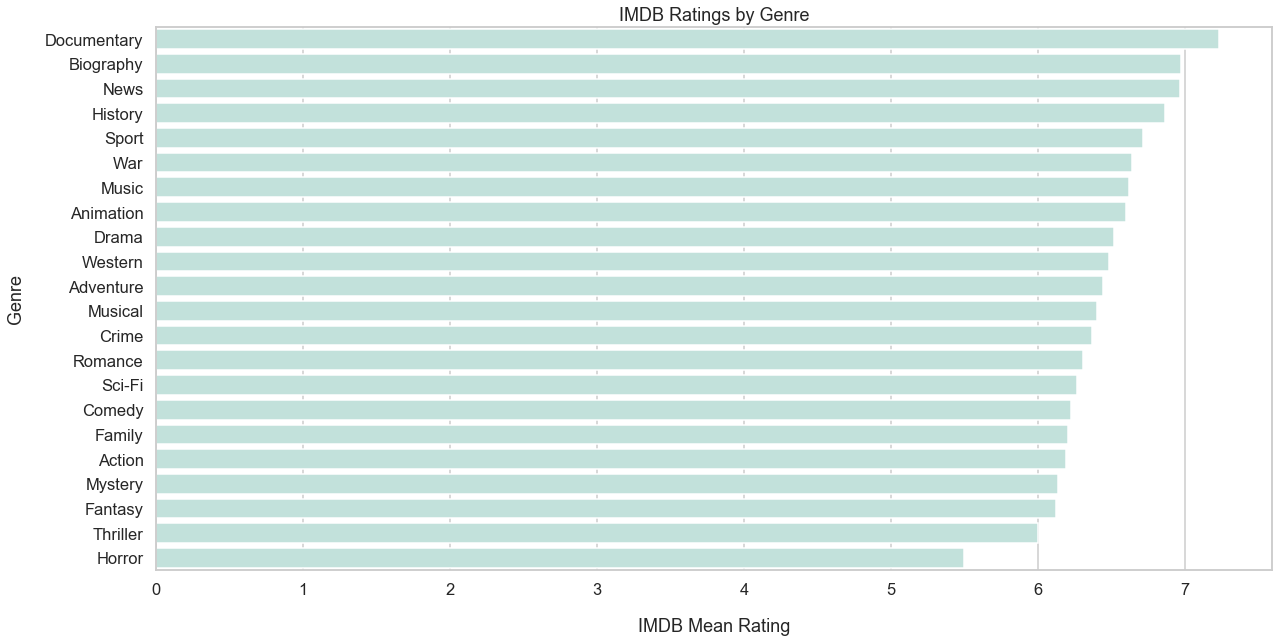

In [92]:
genre_barplots('averagerating', 'genres', imdb_genres_sorted, 'IMDB Ratings by Genre', 
               'IMDB Mean Rating', 'Genre', result['genres'])

Bar plot showing the genres for the movies on IMDB and their ratings in descending order.  This shows which genres of the IMDB data receive the highest and lowest ratings.  

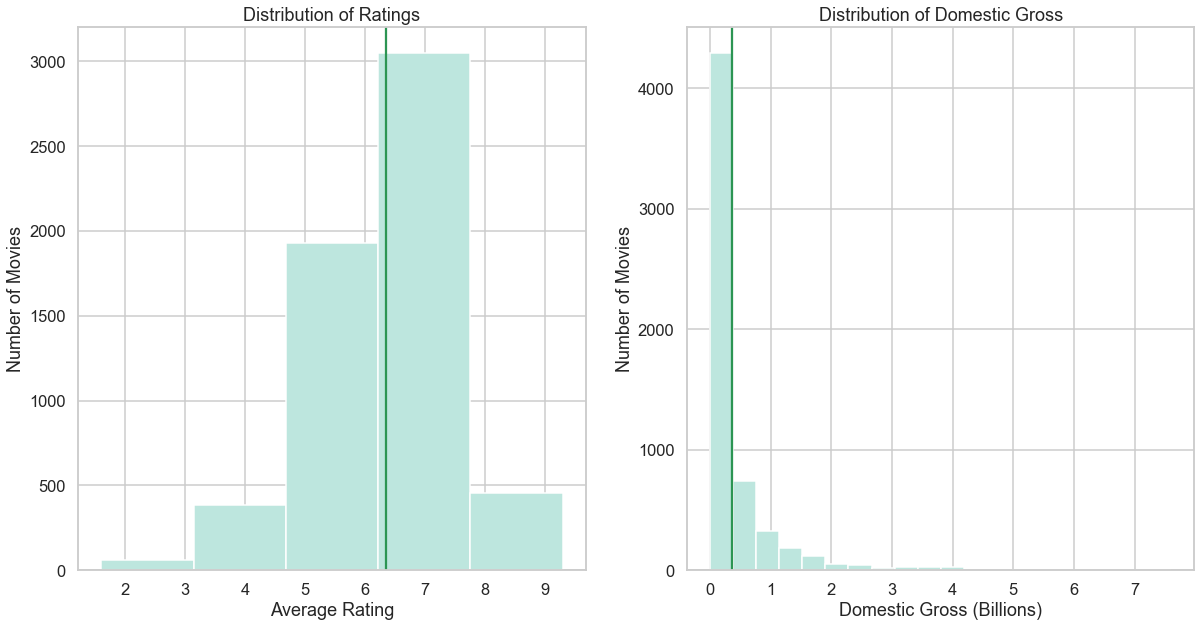

In [93]:
histogram_subplots(imdb_revenue_merge['averagerating'], imdb_revenue_merge['domestic_gross'], 'Average Rating', 
                         'Domestic Gross (Millions USD)', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Domestic Gross', 5, 20)

This histogram subplot shows the distribution of IMDB ratings is approximately normal, but the distribution of the domestic gross figures for the IMDB data is right skewed.

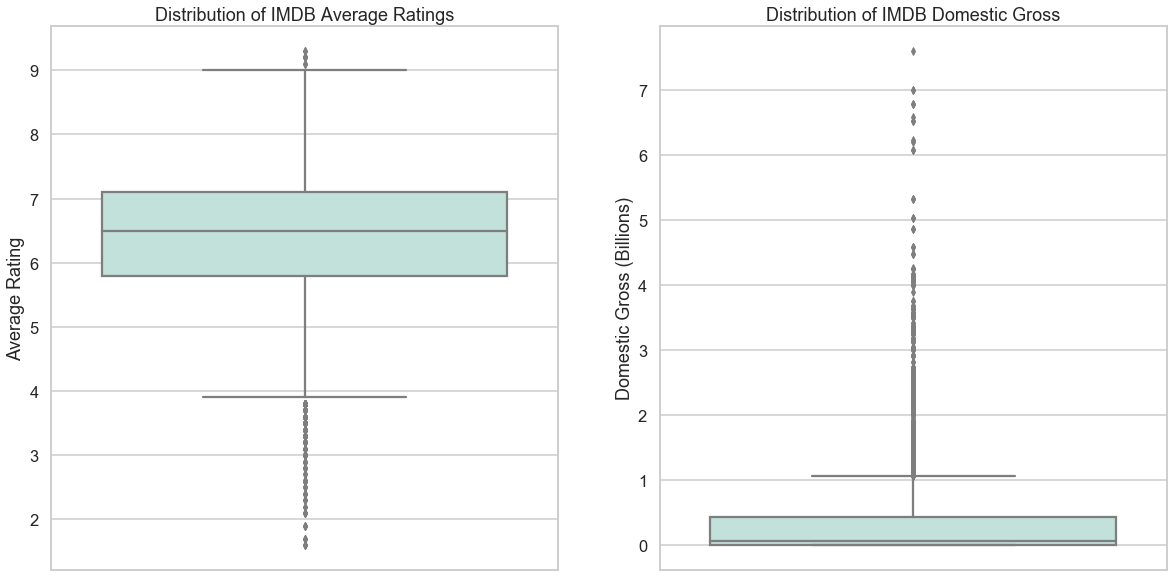

In [94]:
box_subplts(imdb_revenue_merge, 'averagerating', 'domestic_gross', 'Average Rating', 'Domestic Gross (Billions)', 
                           'Distribution of IMDB Average Ratings', 'Distribution of IMDB Domestic Gross' )

The boxplot helps visualize the spread of the data better.  It is clear that the spread of the data is large.

In [95]:
imdb_revenue_merge.corr()['averagerating'].sort_values()

start_year           0.024169
production_budget    0.130967
domestic_gross       0.141853
numvotes             0.293551
averagerating        1.000000
Name: averagerating, dtype: float64

The correlation between ratings and the domestic gross of a movie is not a strong one.

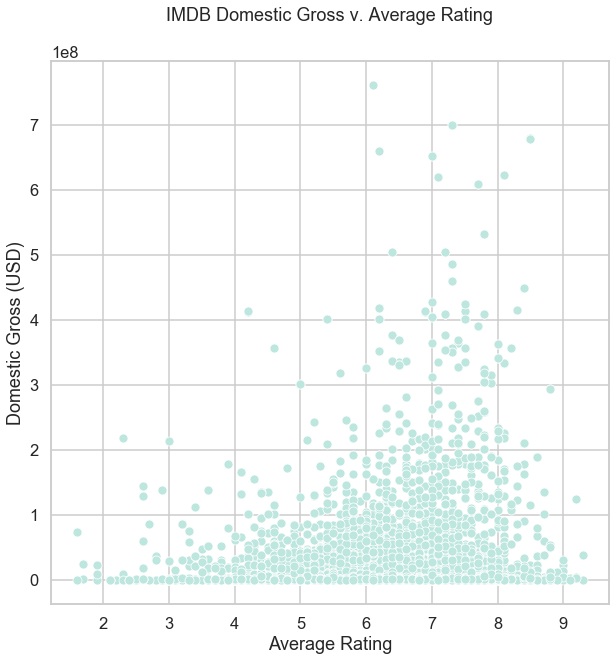

In [96]:
seaborn_scatter('averagerating', 'domestic_gross', imdb_revenue_merge, 'IMDB Domestic Gross v. Average Rating', 
                          'Domestic Gross (USD)', 'Average Rating')

This scatterplot offers visulization of the weak relationship between domestic gross revenue and viewer ratings.

In [97]:
# Bins the budgets into 10 bins and creates a new column in the dataframe with the bin each observation falls in.
imdb_revenue_merge['domgross_bins'] = pd.qcut(imdb_revenue_merge['domestic_gross'], q=10, precision=0)

imdb_revenue_merge.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross,domgross_bins
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,45000000.0,0.0,"(-1.0, 8790.0]"
1,tt0326592,The Overnight,The Overnight,2010,NaN,7.5,24,200000.0,1109808.0,"(410919.0, 1800000.0]"
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,200000.0,1109808.0,"(410919.0, 1800000.0]"
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,25000000.0,720828.0,"(410919.0, 1800000.0]"
4,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,25000000.0,720828.0,"(410919.0, 1800000.0]"


Dataframe created that creates bins for the domestic gross and allows for visualization of ranges of income to illustrate how ratings are distributed across domestic gross.  This was done since the spread of the domestic gross is very large.  

In [98]:
imdb_revenue_merge['domgross_bins'].value_counts()

(410919.0, 1800000.0]         608
(18299189.0, 33680992.0]      589
(82620.0, 410919.0]           589
(103169857.0, 760507625.0]    588
(55165444.0, 103169857.0]     588
(6798848.0, 18299189.0]       588
(8790.0, 82620.0]             588
(-1.0, 8790.0]                588
(33680992.0, 55165444.0]      587
(1800000.0, 6798848.0]        567
Name: domgross_bins, dtype: int64

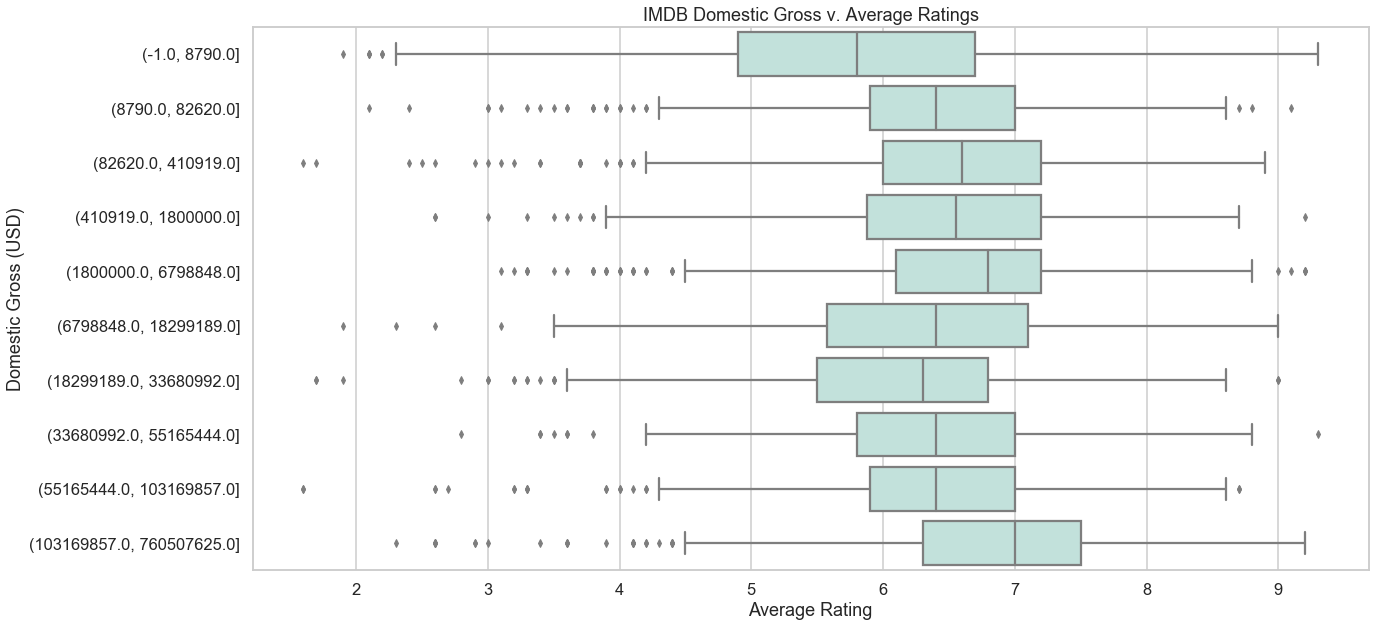

In [99]:
seaborn_bplot('averagerating', 'domgross_bins', imdb_revenue_merge, 'IMDB Domestic Gross v. Average Ratings',
              'Average Rating', 'Domestic Gross (USD)')

This boxplot shows that the mean of average ratings is very similar across the domestic gross ranges.  Ratings awarded to a movie by moviegoes does not appear to impact what a movie earns.

## Question 1 - TMDB Data 

Because the provided data did not contain a way to decode the genre IDs found in TMDB data, an API query was made to extract the information from TMDB for decoding the genre information. 

In [100]:
# gets JSON containing API key
keys = get_keys('/Users/jenlavoie/.secret/tmdb_api.json')

# extracts API key from JSON
api_key = keys['api_key']

In [101]:
# based on documentation for TMDB API, this is all that is required to make the request
url = 'https://api.themoviedb.org/3/genre/movie/list?api_key={}&language=en-US'.format(api_key)

response = requests.get(url) # get the response from the TMDB API

print(response) # 200 - successful

print(type(response.text)) # str type

print(response.text[:1000]) # JSON response

<Response [200]>
<class 'str'>
{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [102]:
tmdb_genre_names = pd.DataFrame(response.json()['genres'])


tmdb_genre_names.head() 

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


Dataframe created from JSON data returned from the API linking the genre ID to the name of the genre for TMDB data.

In [103]:
print(len(tmdb_df)) # 26517

tmdb_df.head()

26517


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [104]:
tmdb_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [105]:
# copy of original dataframe to create genre dataframe for TMDB data
tmdb_genres = tmdb_df.copy()

# removing the [] around the genre IDs
tmdb_genres['genre_ids'] = tmdb_genres['genre_ids'].replace({'\[':'', '\]':''}, regex = True)

# splitting the genre ids at the comma that separates them 
tmdb_genres['genre_ids'] = tmdb_genres['genre_ids'].str.split(", ")

# expanding the genre IDs so that there is a row for each genre ID for each movie
tmdb_genres = tmdb_genres.explode('genre_ids')

tmdb_genres.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [106]:
tmdb_genre_names['id'] = tmdb_genre_names['id'].astype(str)

tmdb_genres = pd.merge(tmdb_genres, tmdb_genre_names, how = 'inner', left_on ='genre_ids', right_on ='id')

tmdb_genres.head()

,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,id_y,name
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,12,Adventure
2,12,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12,Adventure
3,12,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,12,Adventure
4,12,32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,12,Adventure


In [107]:
# dropping unneeded columns
tmdb_genres.drop(['id_y', 'original_language', 'popularity', 'release_date', 'vote_count'], axis=1 , inplace= True)

# renaming columns
tmdb_genres.rename(columns={'id_x': 'id', 'name':'genre'}, inplace=True)

tmdb_genres.head()

,genre_ids,id,original_title,title,vote_average,genre
0,12,12444,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,7.7,Adventure
1,12,10191,How to Train Your Dragon,How to Train Your Dragon,7.7,Adventure
2,12,10138,Iron Man 2,Iron Man 2,6.8,Adventure
3,12,27205,Inception,Inception,8.3,Adventure
4,12,32657,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...,6.1,Adventure


In [108]:
tmdb_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45355 entries, 0 to 45354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre_ids       45355 non-null  object 
 1   id              45355 non-null  int64  
 2   original_title  45355 non-null  object 
 3   title           45355 non-null  object 
 4   vote_average    45355 non-null  float64
 5   genre           45355 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.4+ MB


In [109]:
tmdb_genres.describe()

,id,vote_average
count,45355.000000,45355.000000
mean,285236.268636,5.934331
std,156805.091702,1.719382
min,27.000000,0.000000
25%,136368.000000,5.000000
50%,299858.000000,6.000000
75%,413439.500000,7.000000
max,608079.000000,10.000000


In [110]:
# creating a dataframe sorted by genre 
tmdb_genres_sorted = tmdb_genres.sort_values("genre", inplace=False)

tmdb_genres_sorted.head()

,genre_ids,id,original_title,title,vote_average,genre
6580,28,167733,Vamp U,Vamp U,4.4,Action
6464,28,82682,Gangster Squad,Gangster Squad,6.3,Action
6463,28,211387,Marvel One-Shot: Agent Carter,Marvel One-Shot: Agent Carter,7.6,Action
6462,28,76544,Man of Tai Chi,Man of Tai Chi,6.0,Action
6461,28,142061,"Batman: The Dark Knight Returns, Part 2","Batman: The Dark Knight Returns, Part 2",7.9,Action


In [111]:
# variable that groups by genre, aggregates by mean of the average rating for the genres and sorts those values 
# by the average rating for the genres.
result = tmdb_genres_sorted.groupby(['genre'])['vote_average'].aggregate(np.mean).reset_index().sort_values(
    ['vote_average'], ascending=False)

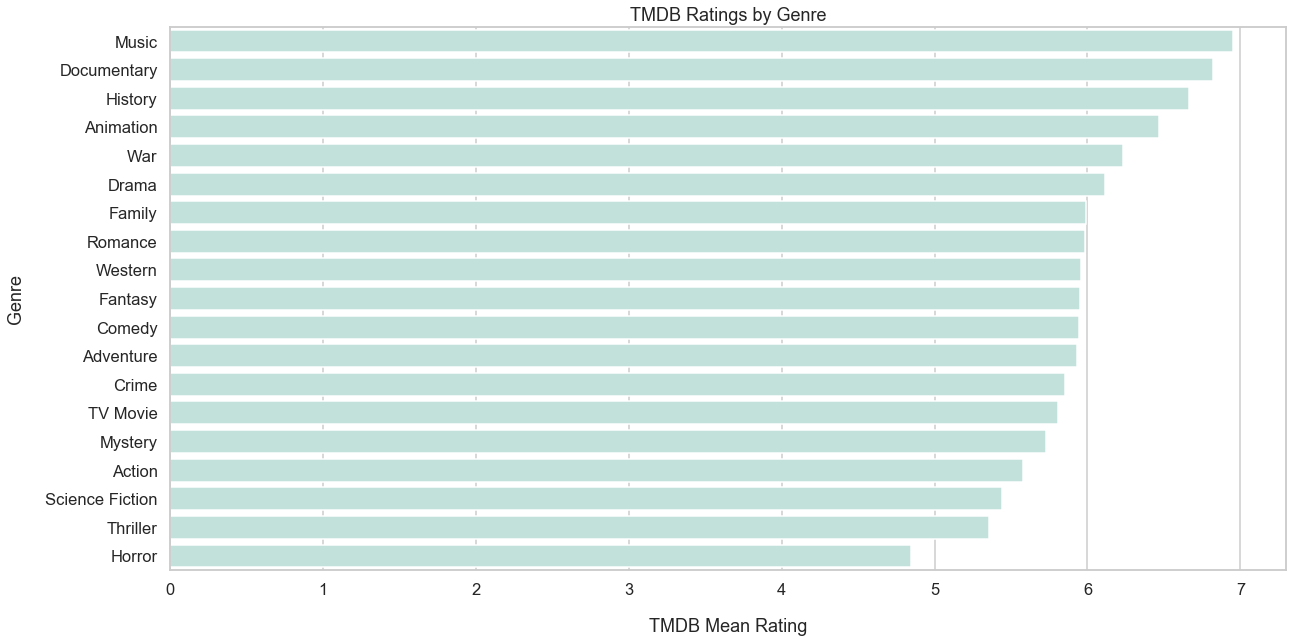

In [112]:
genre_barplots('vote_average', 'genre', tmdb_genres_sorted, 'TMDB Ratings by Genre', 
               'TMDB Mean Rating', 'Genre', result['genre'])

Bar plot showing the TMDB movie genres according to their ratings in descending order.

In [113]:
tmdb_df.drop(['id','original_language', 'popularity', 'release_date', 'vote_count'], axis=1 , inplace= True)

tmdb_tn_merge = pd.merge(tmdb_df, tn_df, how = 'inner', left_on = 'original_title', right_on ='movie')

tmdb_tn_merge.head()

,genre_ids,original_title,title,vote_average,release_date,movie,production_budget,domestic_gross
0,"[14, 12, 16, 10751]",How to Train Your Dragon,How to Train Your Dragon,7.7,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232
1,"[12, 28, 878]",Iron Man 2,Iron Man 2,6.8,"May 7, 2010",Iron Man 2,170000000,312433331
2,"[16, 35, 10751]",Toy Story,Toy Story,7.9,"Nov 22, 1995",Toy Story,30000000,191796233
3,"[16, 35, 10751]",Toy Story,Toy Story,7.9,"Nov 22, 1995",Toy Story,30000000,191796233
4,"[28, 878, 12]",Inception,Inception,8.3,"Jul 16, 2010",Inception,160000000,292576195


This dataframe combines The Movie DB data with tn data to give only the movies in the move data base data that also have domestic gross information located in the tn_df.

In [114]:
tmdb_tn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          2316 non-null   object 
 1   original_title     2316 non-null   object 
 2   title              2316 non-null   object 
 3   vote_average       2316 non-null   float64
 4   release_date       2316 non-null   object 
 5   movie              2316 non-null   object 
 6   production_budget  2316 non-null   int64  
 7   domestic_gross     2316 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 162.8+ KB


There are no NaN values in the data

In [115]:
tmdb_tn_merge.describe()

,vote_average,production_budget,domestic_gross
count,2316.000000,2.316000e+03,2.316000e+03
mean,6.206261,3.790108e+07,4.953869e+07
std,1.178079,5.150964e+07,8.261483e+07
min,0.000000,9.000000e+03,0.000000e+00
25%,5.600000,5.000000e+06,7.788272e+05
50%,6.300000,1.900000e+07,2.015790e+07
75%,6.900000,4.650000e+07,5.830223e+07
max,10.000000,4.250000e+08,7.605076e+08


The vote average for this data is around 6.2 (similar to IMDb data) and the mean domestic gross is around 50 million dollars. 

In [116]:
print(len(tmdb_tn_merge)) # 2316

2316


In [117]:
tmdb_bom_merge = pd.merge(tmdb_df, bom_df, how = 'inner', left_on ='original_title', right_on ='title')

# Dropping some columns that won't pertain to this analysis for readability
tmdb_bom_merge.drop(['year', 'title_x', 'title_y', 'studio', 'foreign_gross'], axis=1, inplace=True)

tmdb_bom_merge.head()

,genre_ids,original_title,vote_average,domestic_gross
0,"[14, 12, 16, 10751]",How to Train Your Dragon,7.7,217600000.0
1,"[12, 28, 878]",Iron Man 2,6.8,312400000.0
2,"[28, 878, 12]",Inception,8.3,292600000.0
3,"[16, 10751, 35]",Toy Story 3,7.7,415000000.0
4,"[16, 10751, 35]",Despicable Me,7.2,251500000.0


In [118]:
print(len(tmdb_bom_merge)) # 2280

2280


In [119]:
tmdb_revenue_merge = pd.merge(tmdb_tn_merge, tmdb_bom_merge, how = 'outer', 
                              left_on = ['original_title', 'domestic_gross', 'vote_average', 'genre_ids'], 
                              right_on =['original_title', 'domestic_gross', 'vote_average', 'genre_ids'])

tmdb_revenue_merge.drop(['title', 'release_date', 'movie', 'production_budget'], axis=1, inplace=True)

tmdb_revenue_merge.drop_duplicates(subset=None, keep='first', inplace=True)

tmdb_revenue_merge.head()

,genre_ids,original_title,vote_average,domestic_gross
0,"[14, 12, 16, 10751]",How to Train Your Dragon,7.7,217581232.0
1,"[12, 28, 878]",Iron Man 2,6.8,312433331.0
2,"[16, 35, 10751]",Toy Story,7.9,191796233.0
4,"[28, 878, 12]",Inception,8.3,292576195.0
5,"[12, 14, 10751]",Percy Jackson & the Olympians: The Lightning T...,6.1,88768303.0


This database was created performing an outer join so it contains all movies located in the TMDB data that have domestic gross information available in either the BOM or TN data or both.  

In [120]:
print(len(tmdb_revenue_merge)) # 4203

4198


In [121]:
tmdb_revenue_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 4595
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre_ids       4198 non-null   object 
 1   original_title  4198 non-null   object 
 2   vote_average    4198 non-null   float64
 3   domestic_gross  4186 non-null   float64
dtypes: float64(2), object(2)
memory usage: 164.0+ KB


In [122]:
# dropping the NaN values found in the domestic_gross column as it is a small amount of data loss
tmdb_revenue_merge.dropna(subset = ['domestic_gross'], axis = 0, inplace=True)

tmdb_revenue_merge['domestic_gross'].isna().sum()

0

In [123]:
tmdb_revenue_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4186 entries, 0 to 4595
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre_ids       4186 non-null   object 
 1   original_title  4186 non-null   object 
 2   vote_average    4186 non-null   float64
 3   domestic_gross  4186 non-null   float64
dtypes: float64(2), object(2)
memory usage: 163.5+ KB


In [124]:
tmdb_revenue_merge.describe()

,vote_average,domestic_gross
count,4186.000000,4.186000e+03
mean,6.257119,4.550877e+07
std,1.070945,8.087676e+07
min,0.000000,0.000000e+00
25%,5.700000,5.294998e+05
50%,6.300000,1.501202e+07
75%,6.900000,5.451030e+07
max,10.000000,9.367000e+08


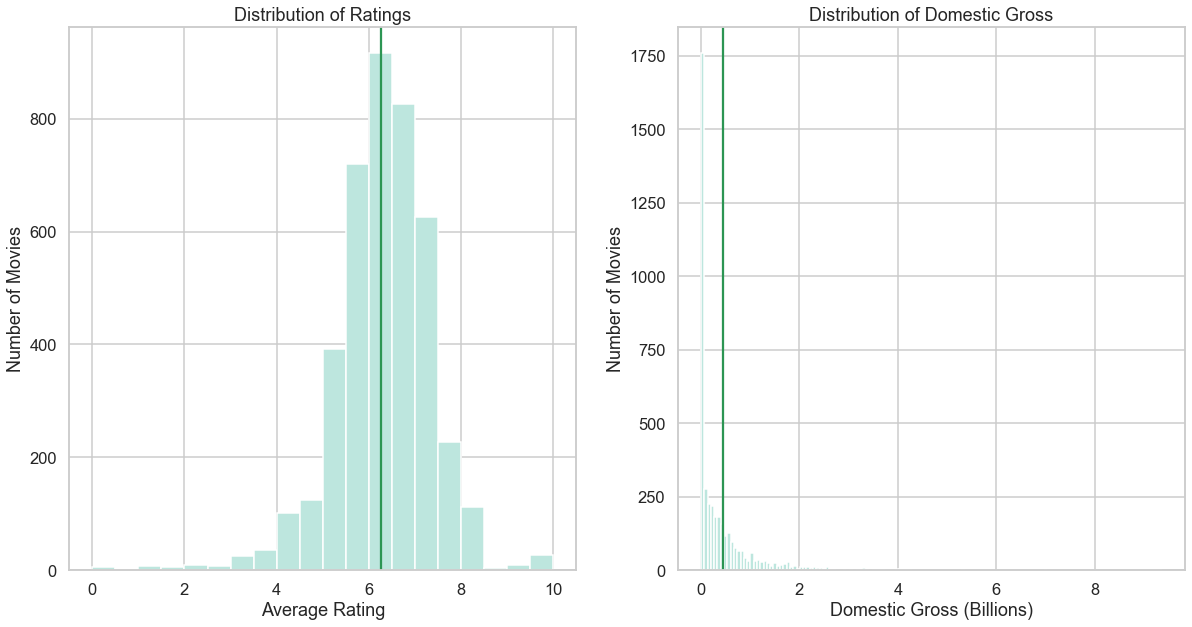

In [125]:
histogram_subplots(tmdb_revenue_merge['vote_average'], tmdb_revenue_merge['domestic_gross'], 'Average Rating', 
                         'Domestic Gross (Millions USD)', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Domestic Gross', 20)

The distribution of ratings is fairly normal while the distribution of domestic gross is right skewed.

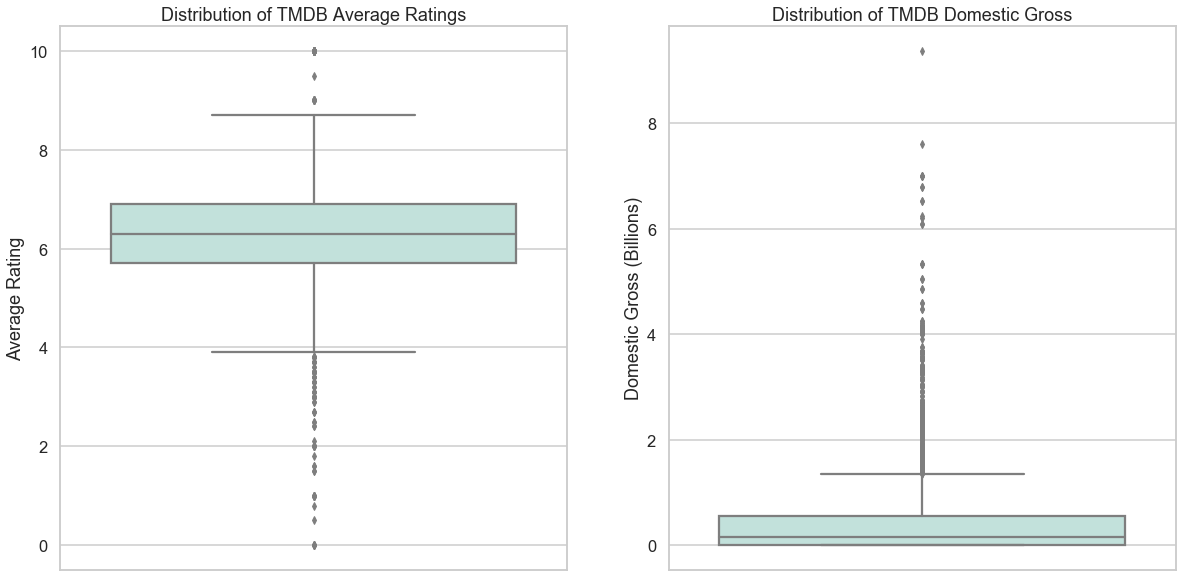

In [126]:
box_subplts(tmdb_revenue_merge, 'vote_average', 'domestic_gross', 'Average Rating', 'Domestic Gross (Millions USD)', 
                           'Distribution of TMDB Average Ratings', 'Distribution of TMDB Domestic Gross' )

Boxplot giving a better visualization of the distribution of the data.  This shows the spread for this data is large.

In [127]:
tmdb_revenue_merge.corr()['vote_average'].sort_values()

domestic_gross    0.178999
vote_average      1.000000
Name: vote_average, dtype: float64

Vote average and domestic gross do not show a strong correlation with one another. 

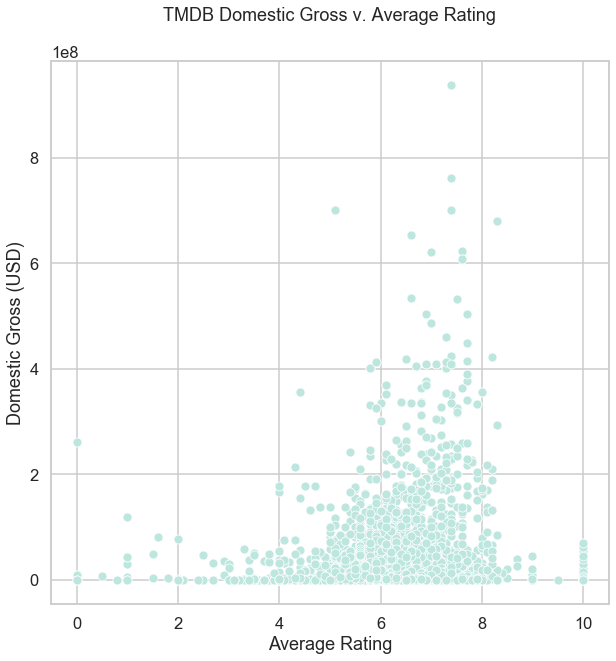

In [128]:
seaborn_scatter('vote_average', 'domestic_gross', tmdb_revenue_merge, 'TMDB Domestic Gross v. Average Rating', 
                'Domestic Gross (USD)', 'Average Rating')

This scatterplot provides visualization of the very weak relationship between the ratings a user gives a movie and how much revenue the movie brings in.

In [129]:
# Bins the budgets into 10 bins and creates a new column in the dataframe with the bin each observation falls in.
tmdb_revenue_merge['domgross_bins'] = pd.qcut(tmdb_revenue_merge['domestic_gross'], q=10, precision=0)

tmdb_revenue_merge.head()

,genre_ids,original_title,vote_average,domestic_gross,domgross_bins
0,"[14, 12, 16, 10751]",How to Train Your Dragon,7.7,217581232.0,"(126488542.0, 936700000.0]"
1,"[12, 28, 878]",Iron Man 2,6.8,312433331.0,"(126488542.0, 936700000.0]"
2,"[16, 35, 10751]",Toy Story,7.9,191796233.0,"(126488542.0, 936700000.0]"
4,"[28, 878, 12]",Inception,8.3,292576195.0,"(126488542.0, 936700000.0]"
5,"[12, 14, 10751]",Percy Jackson & the Olympians: The Lightning T...,6.1,88768303.0,"(67200000.0, 126488542.0]"


This dataframe was created in order to create bins of 10 different domestic gross ranges to see how voter ratings fall within ranges, given that the spread of the domestic gross is large.  

In [130]:
tmdb_revenue_merge['domgross_bins'].value_counts()

(168000.0, 1300000.0]         430
(126488542.0, 936700000.0]    419
(43693633.0, 67200000.0]      419
(15012024.0, 27778642.0]      419
(13393.0, 168000.0]           419
(-1.0, 13393.0]               419
(67200000.0, 126488542.0]     418
(27778642.0, 43693633.0]      418
(5100000.0, 15012024.0]       418
(1300000.0, 5100000.0]        407
Name: domgross_bins, dtype: int64

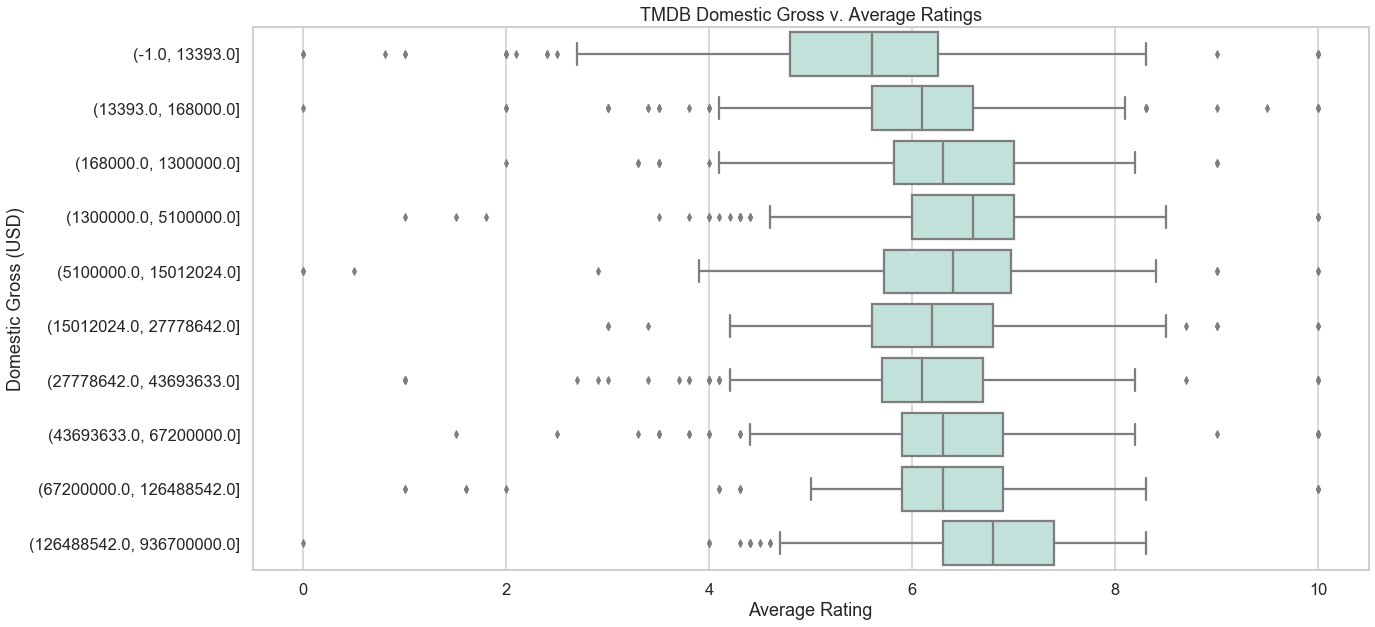

In [131]:
seaborn_bplot('vote_average', 'domgross_bins', tmdb_revenue_merge, 'TMDB Domestic Gross v. Average Ratings',
              'Average Rating', 'Domestic Gross (USD)')

This boxplot allows for visualization of how the average rating means compare with different ranges of domestic gross.  The vote averages fall within a similar range regardless of the range of the domestic gross of the movie.  

## Discussion Concerning Question 1:



## Code and Visualizations pertinent to answering Question 2:

Which genres tend to cost more to make and which genres tend to have the highest domestic gross? 

## Question 2 - Rotten Tomatoes Data 

For this question, Rotten Tomatoes data will only help answer the second part of the question as there is no way to link the rt data to the tn data that contains the production budgent information.  

In [132]:
# grouping by genre, aggregating by mean box_office, and sorting by the mean box_office for each genre 
result = rt_genres_sorted.groupby(['genre'])['box_office'].aggregate(np.mean).reset_index().sort_values(
    ['box_office'], ascending=False)

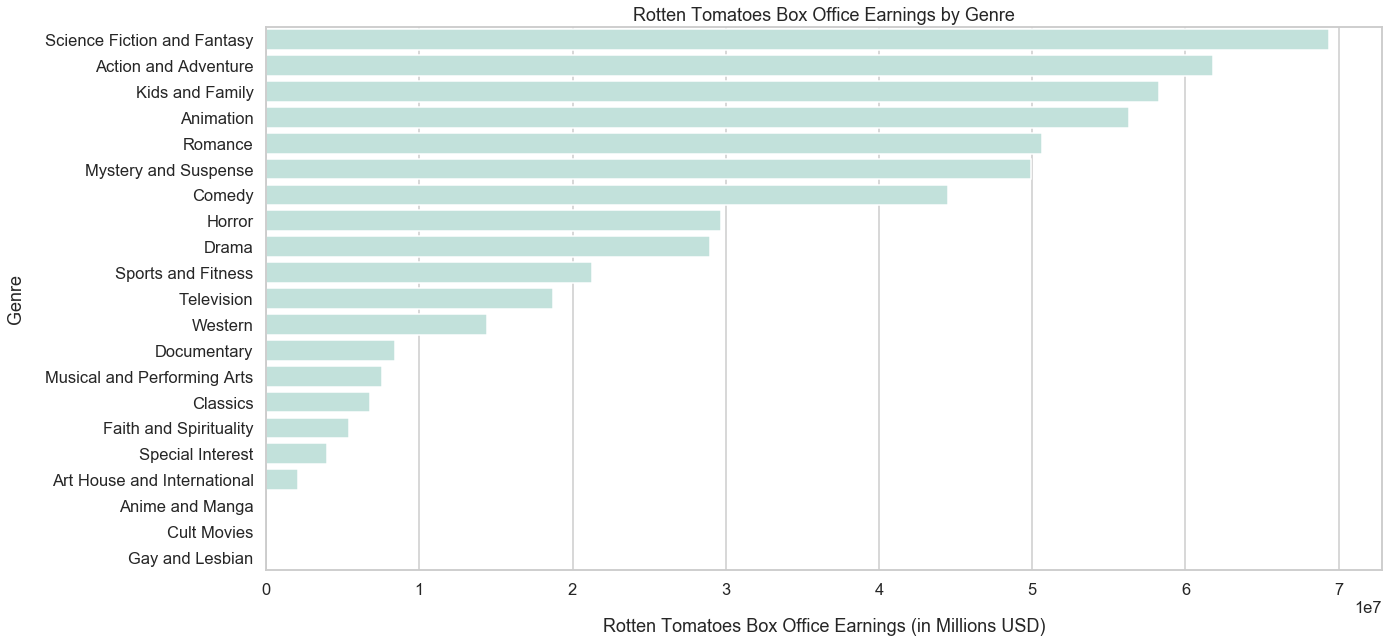

In [133]:
genre_barplots('box_office', 'genre', rt_genres_sorted, 'Rotten Tomatoes Box Office Earnings by Genre', 
               'Rotten Tomatoes Box Office Earnings (in Millions USD)', 'Genre', result['genre'])

## Question 2 - IMDB Data 

In [134]:
imdb_tn_merge.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,45000000,0
1,tt0326592,The Overnight,The Overnight,2010,NaN,7.5,24,200000,1109808
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,200000,1109808
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,25000000,720828
4,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,25000000,720828


In [135]:
# create copy of revenue df to create a genres dataframe without altering original
imdb_genres_budget = imdb_tn_merge.copy()

# split the multiple genres based on the comma that separates them 
imdb_genres_budget['genres'] = imdb_genres_budget['genres'].str.split(",")

# expand the rows such that a row is created for each genre for each movie
imdb_genres_budget = imdb_genres_budget.explode('genres')

imdb_genres_budget.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,Action,1.9,8248,45000000,0
0,tt0249516,Foodfight!,Foodfight!,2012,Animation,1.9,8248,45000000,0
0,tt0249516,Foodfight!,Foodfight!,2012,Comedy,1.9,8248,45000000,0
1,tt0326592,The Overnight,The Overnight,2010,NaN,7.5,24,200000,1109808
2,tt3844362,The Overnight,The Overnight,2015,Comedy,6.1,14828,200000,1109808


In [136]:
imdb_genres_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6452 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6452 non-null   object 
 1   primary_title      6452 non-null   object 
 2   original_title     6452 non-null   object 
 3   start_year         6452 non-null   int64  
 4   genres             6444 non-null   object 
 5   averagerating      6452 non-null   float64
 6   numvotes           6452 non-null   int64  
 7   production_budget  6452 non-null   int64  
 8   domestic_gross     6452 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 504.1+ KB


No null values found in this dataframe. 

In [137]:
# creating a dataframe sorted by genre 
imdb_genres_budget_sorted = imdb_genres_budget.sort_values("genres", inplace=False)

imdb_genres_budget_sorted.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,Action,1.9,8248,45000000,0
1574,tt1984208,Moby Dick,Mo-bi-dik,2011,Action,6.4,295,4500000,10400000
1571,tt1981128,Geostorm,Geostorm,2017,Action,5.3,78287,100000000,33700160
1570,tt1981115,Thor: The Dark World,Thor: The Dark World,2013,Action,6.9,540996,150000000,206362140
1569,tt1981107,The Young and Prodigious T.S. Spivet,The Young and Prodigious T.S. Spivet,2013,Action,7.1,15372,33000000,176847


In [138]:
# grouping by genre, aggregating by mean domestic_gross and sorting by the mean domestic_gross for each genre 
result = imdb_genres_budget_sorted.groupby(['genres'])['domestic_gross'].aggregate(np.mean).reset_index().sort_values(
    ['domestic_gross'], ascending=False)

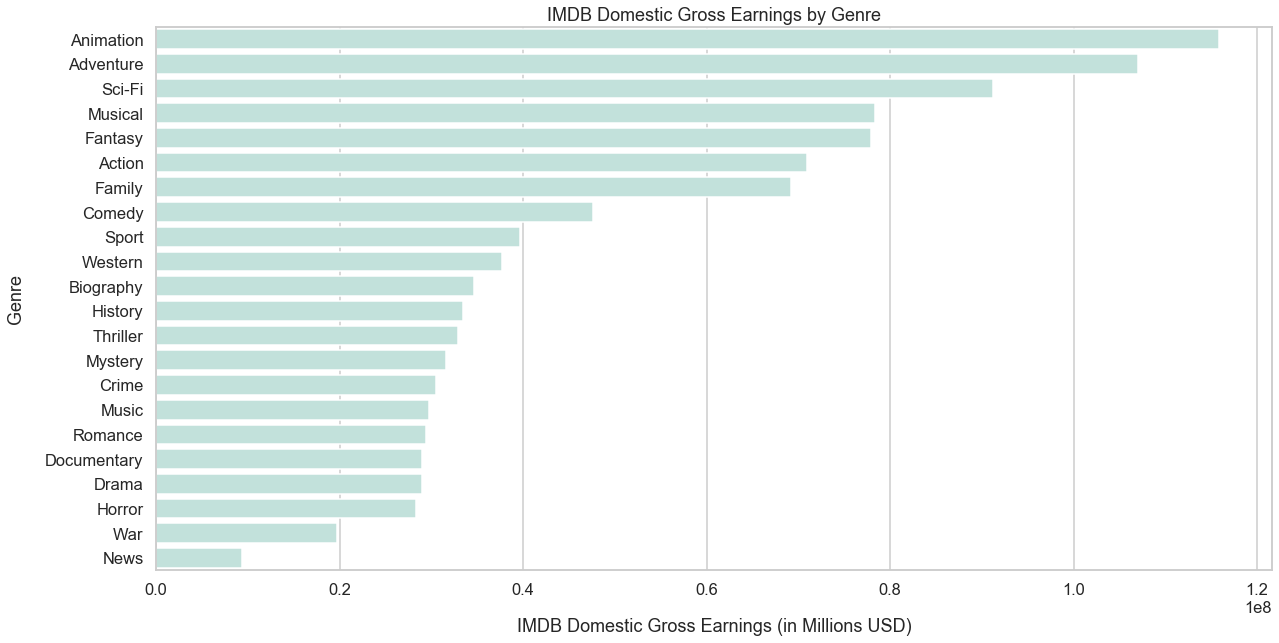

In [139]:
genre_barplots('domestic_gross', 'genres', imdb_genres_budget_sorted, 'IMDB Domestic Gross Earnings by Genre', 
               'IMDB Domestic Gross Earnings (in Millions USD)', 'Genre', result['genres'])

In [140]:
imdb_genres_sorted.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,Action,1.9,8248,45000000.0,0.0
2498,tt3910736,Gun Shy,Gun Shy,2017,Action,4.1,2216,10000000.0,1638202.0
2500,tt3949660,Teenage Mutant Ninja Turtles: Out of the Shadows,Teenage Mutant Ninja Turtles: Out of the Shadows,2016,Action,6.0,77234,135000000.0,82051601.0
563,tt1376195,Gunless,Gunless,2010,Action,6.5,3376,9900000.0,458054.0
2507,tt3976258,Amidst the Devil's Wings,Amidst the Devil's Wings,2014,Action,4.0,33,300000.0,0.0


In [141]:
# grouping by genre, aggregating by mean domestic_gross and sorting by the mean domestic_gross for each genre 
result = imdb_genres_sorted.groupby(['genres'])['production_budget'].aggregate(np.mean).reset_index().sort_values(
    ['production_budget'], ascending=False)

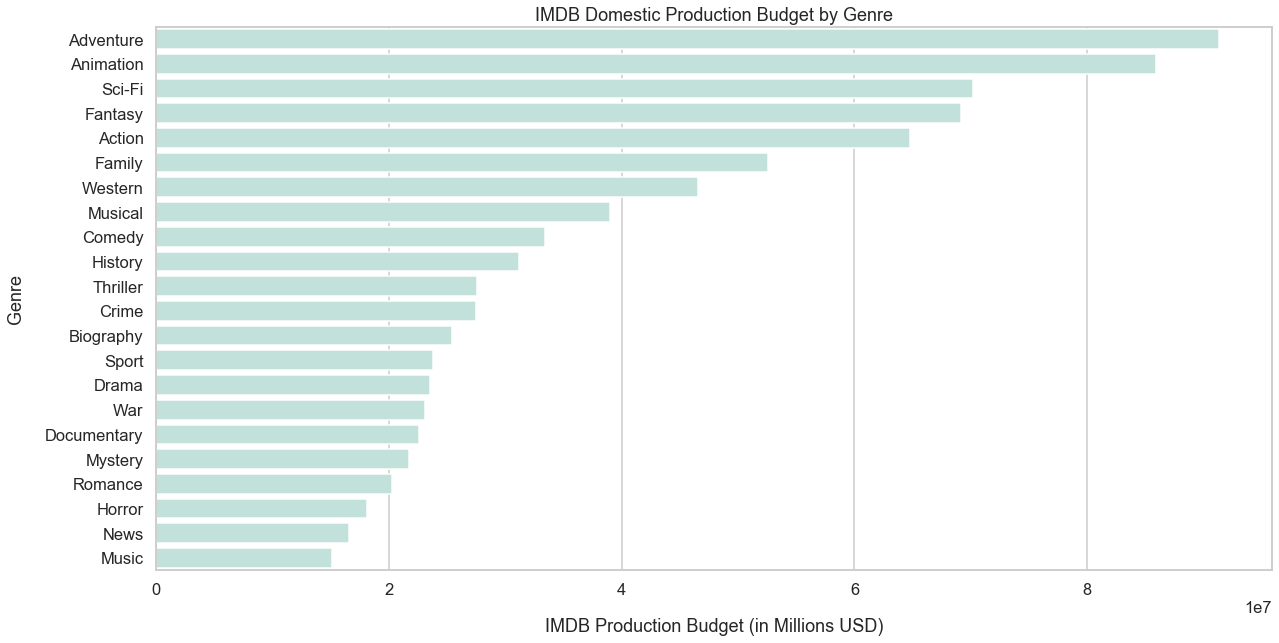

In [142]:
genre_barplots('production_budget', 'genres', imdb_genres_sorted, 'IMDB Domestic Production Budget by Genre', 
               'IMDB Production Budget (in Millions USD)', 'Genre', result['genres'])

## Question  - TMDB Data 

In [172]:
tmdb_genres.head()

,genre_ids,id,original_title,title,vote_average,genre
0,12,12444,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,7.7,Adventure
1,12,10191,How to Train Your Dragon,How to Train Your Dragon,7.7,Adventure
2,12,10138,Iron Man 2,Iron Man 2,6.8,Adventure
3,12,27205,Inception,Inception,8.3,Adventure
4,12,32657,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...,6.1,Adventure


In [157]:
# copy of original dataframe to create genre dataframe for TMDB data
tmdb_genres_budget = tmdb_genres.copy()


tmdb_genres_budget = pd.merge(tmdb_genres, tmdb_tn_merge, how = 'inner', left_on = ['original_title',
                    'title', 'vote_average'], right_on =['original_title',
                    'title', 'vote_average'])

tmdb_genres_budget.drop(['genre_ids_x', 'genre_ids_y', 'release_date', 'movie'], axis=1, inplace=True)

tmdb_genres_budget.head()

,id,original_title,title,vote_average,genre,production_budget,domestic_gross
0,10191,How to Train Your Dragon,How to Train Your Dragon,7.7,Adventure,165000000,217581232
1,10191,How to Train Your Dragon,How to Train Your Dragon,7.7,Fantasy,165000000,217581232
2,10191,How to Train Your Dragon,How to Train Your Dragon,7.7,Family,165000000,217581232
3,10191,How to Train Your Dragon,How to Train Your Dragon,7.7,Animation,165000000,217581232
4,10138,Iron Man 2,Iron Man 2,6.8,Adventure,170000000,312433331


Dataframe created that merges the TMDB genres with the tn production budget information.

In [158]:
# creating a dataframe sorted by genre 
tmdb_genres_budget_sorted = tmdb_genres_budget.sort_values("genre", inplace=False)

tmdb_genres_budget_sorted.head()

,id,original_title,title,vote_average,genre,production_budget,domestic_gross
2363,70006,Never Back Down 2: The Beatdown,Never Back Down 2: The Beatdown,6.0,Action,3000000,0
3135,335983,Venom,Venom,6.6,Action,116000000,213511408
3136,335983,Venom,Venom,6.6,Action,25000000,881745
3142,345940,The Meg,The Meg,5.9,Action,178000000,145443742
3146,400535,Sicario: Day of the Soldado,Sicario: Day of the Soldado,6.7,Action,35000000,50065850


In [160]:
# grouping by genre, aggregating by mean production budget and sorting by the mean production_budget for each genre 
result = tmdb_genres_budget_sorted.groupby(['genre'])['production_budget'].aggregate(np.mean).reset_index().sort_values(
    ['production_budget'], ascending=False)

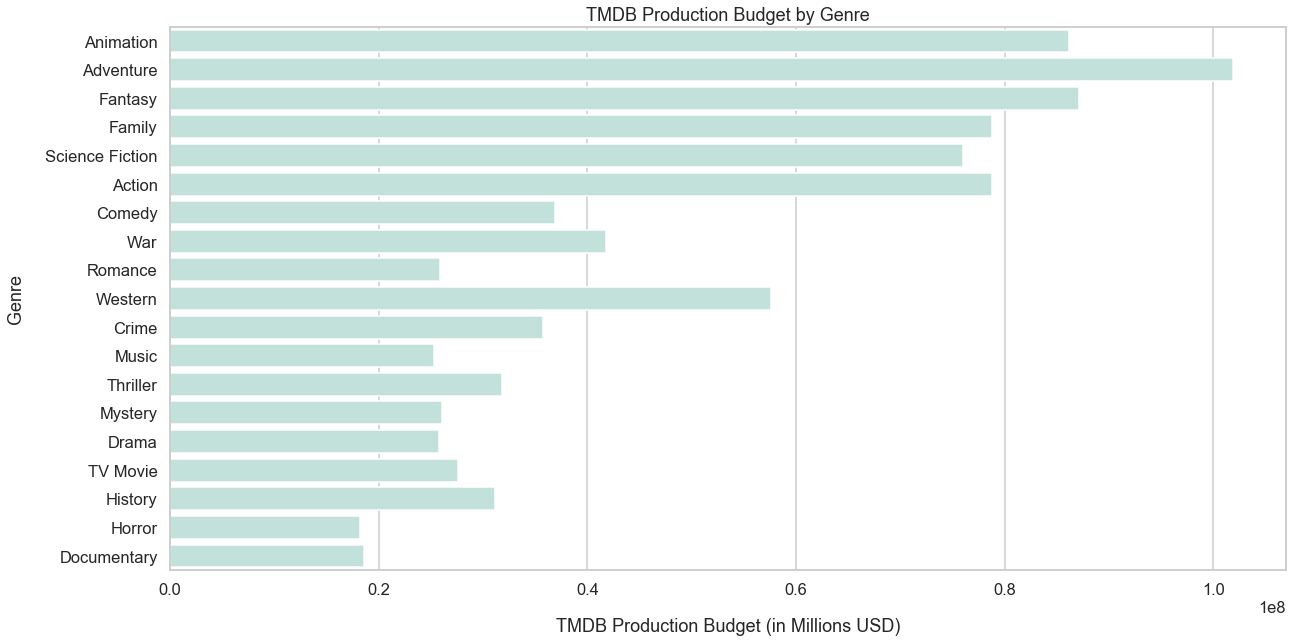

In [169]:
genre_barplots('production_budget', 'genre', tmdb_genres_budget_sorted, 'TMDB Production Budget by Genre', 
               'TMDB Production Budget (in Millions USD)', 'Genre', result['genre'])

In [164]:
tmdb_genre_revenue_merge = pd.merge(tmdb_genres_budget, tmdb_bom_merge, how = 'outer', 
                              left_on = ['original_title', 'domestic_gross', 'vote_average'], 
                              right_on =['original_title', 'domestic_gross', 'vote_average'])

tmdb_genre_revenue_merge.drop(['title', 'genre_ids'], axis=1, inplace=True)

tmdb_genre_revenue_merge.drop_duplicates(subset=None, keep='first', inplace=True)

tmdb_genre_revenue_merge.head()

,id,original_title,vote_average,genre,production_budget,domestic_gross
0,10191.0,How to Train Your Dragon,7.7,Adventure,165000000.0,217581232.0
1,10191.0,How to Train Your Dragon,7.7,Fantasy,165000000.0,217581232.0
2,10191.0,How to Train Your Dragon,7.7,Family,165000000.0,217581232.0
3,10191.0,How to Train Your Dragon,7.7,Animation,165000000.0,217581232.0
4,10138.0,Iron Man 2,6.8,Adventure,170000000.0,312433331.0


In [167]:
# creating a dataframe sorted by genre 
tmdb_genre_revenue_sorted = tmdb_genre_revenue_merge.sort_values("genre", inplace=False)

tmdb_genre_revenue_sorted.head()

,id,original_title,vote_average,genre,production_budget,domestic_gross
3142,345940.0,The Meg,5.9,Action,178000000.0,145443742.0
2251,23483.0,Kick-Ass,7.1,Action,28000000.0,48071303.0
2253,27576.0,Salt,6.3,Action,130000000.0,118311368.0
2256,23631.0,Machete,6.3,Action,12500000.0,26593646.0
2259,31867.0,Repo Men,6.2,Action,32000000.0,13942007.0


In [170]:
# grouping by genre, aggregating by mean production budget and sorting by the mean production_budget for each genre 
result = tmdb_genre_revenue_sorted.groupby(['genre'])['domestic_gross'].aggregate(np.mean).reset_index().sort_values(
    ['domestic_gross'], ascending=False)

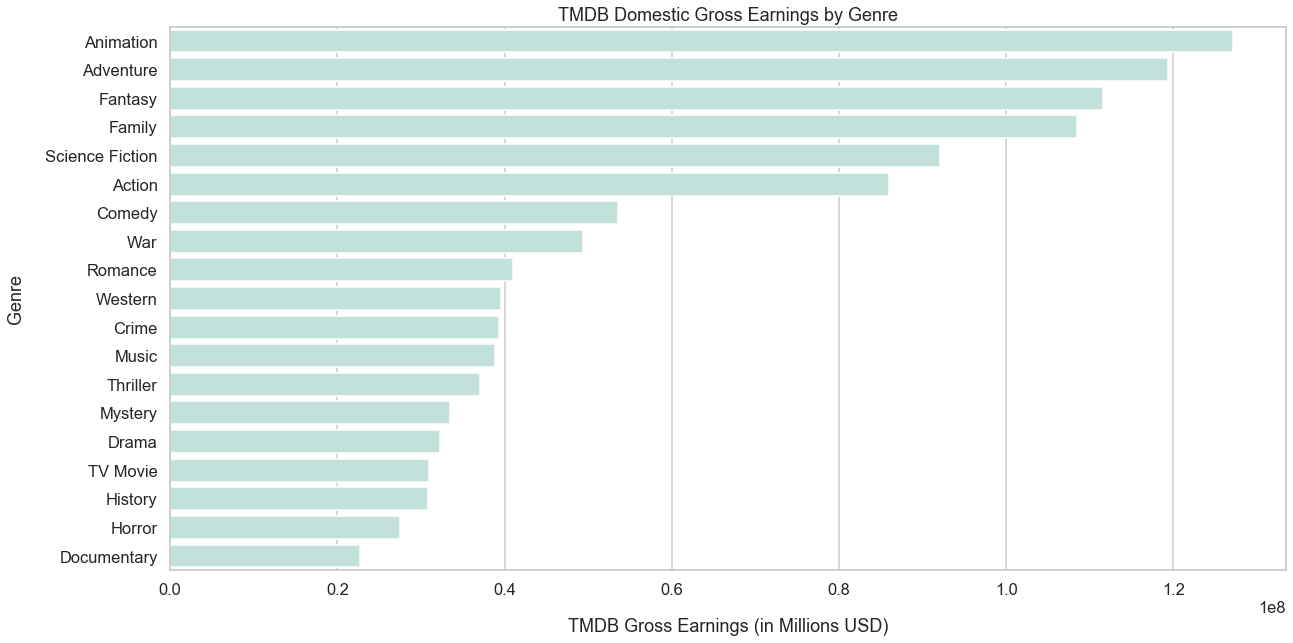

In [171]:
genre_barplots('domestic_gross', 'genre', tmdb_genre_revenue_sorted, 'TMDB Domestic Gross Earnings by Genre', 
               'TMDB Gross Earnings (in Millions USD)', 'Genre', result['genre'])

## Discussion Concerning Question 2: 


## Code and Visualizations pertinent to answering Question 3:

Does the size of the movie budget impact the domestic gross income of a movie?

In [143]:
tn_df.head()

,release_date,movie,production_budget,domestic_gross
0,"Dec 18, 2009",Avatar,425000000,760507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382


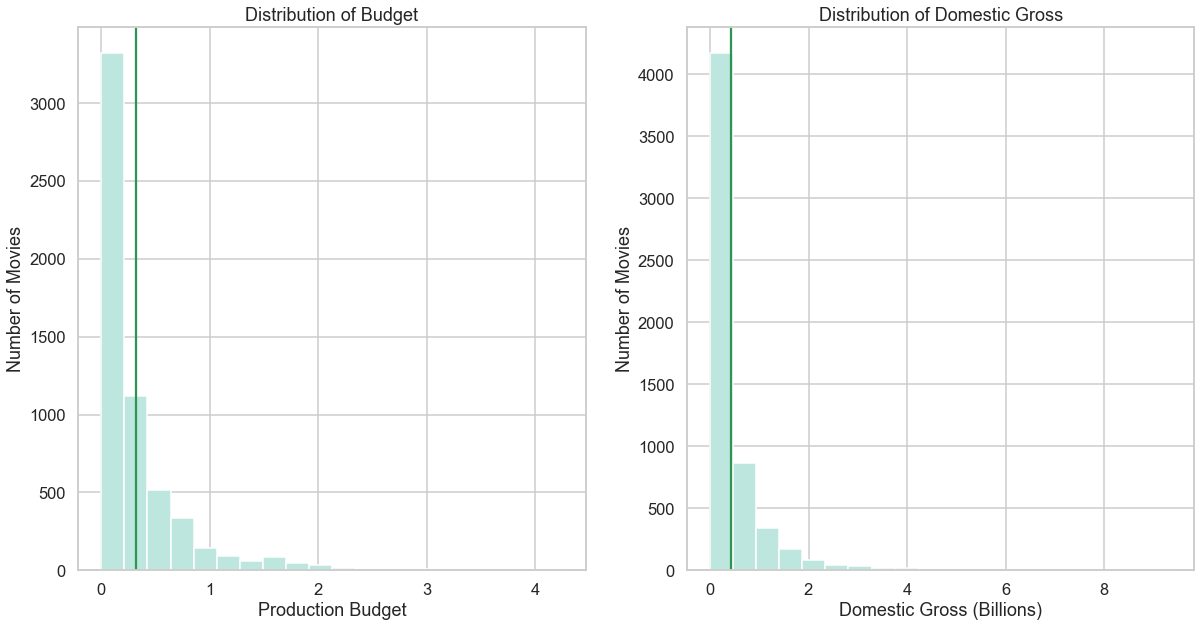

In [144]:
histogram_subplots(tn_df['production_budget'], tn_df['domestic_gross'], 'Production Budget', 
                         'Domestic Gross (Billions)', 'Number of Movies', 'Number of Movies', 'Distribution of Budget', 
                         'Distribution of Domestic Gross', 20, 20)

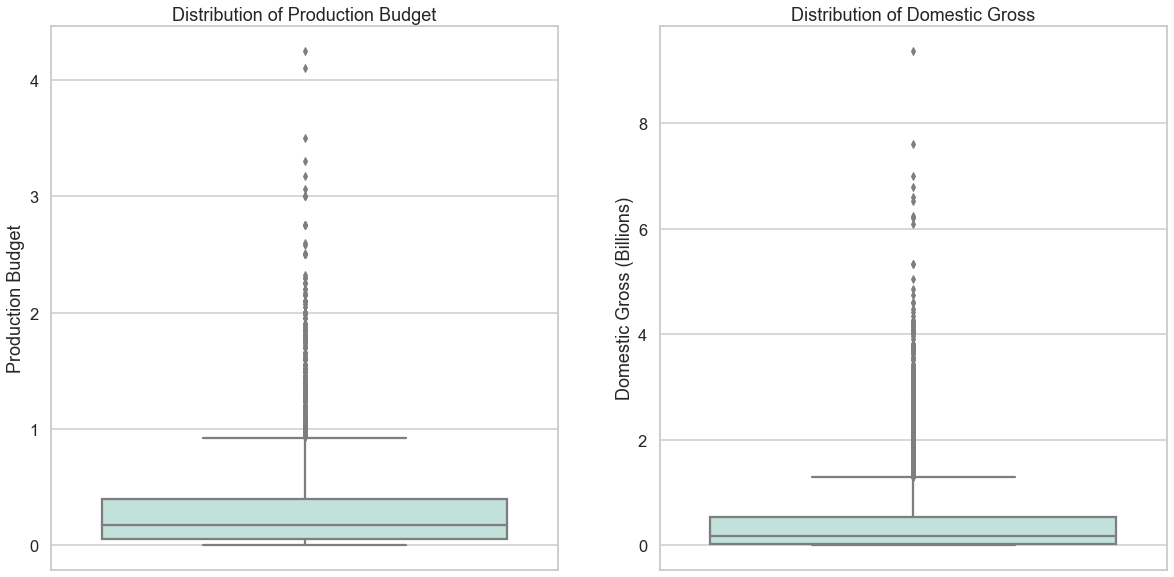

In [145]:
box_subplts(tn_df, 'production_budget', 'domestic_gross', 'Production Budget', 'Domestic Gross (Billions)', 
                           'Distribution of Production Budget', 'Distribution of Domestic Gross' )

In [146]:
tn_df.corr()['domestic_gross'].sort_values()

production_budget    0.685682
domestic_gross       1.000000
Name: domestic_gross, dtype: float64

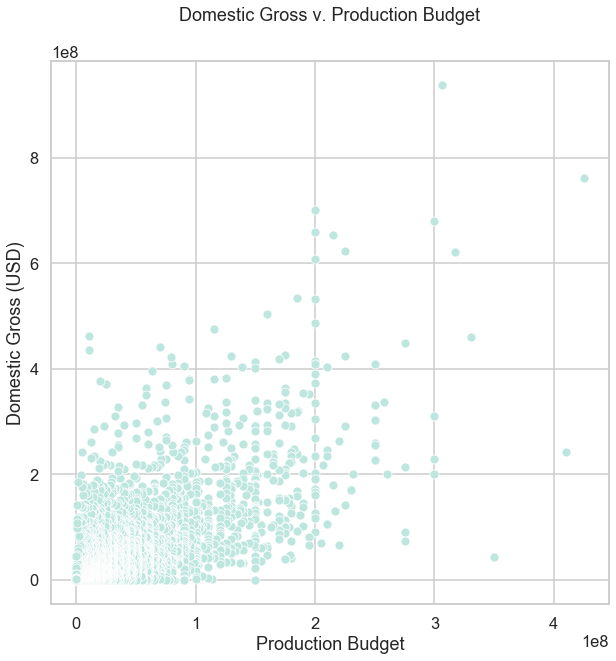

In [147]:
seaborn_scatter('production_budget', 'domestic_gross', tn_df, 'Domestic Gross v. Production Budget', 
                'Domestic Gross (USD)', 'Production Budget')

## Discussion Concerning Question 3:
